In [70]:
import warnings
warnings.filterwarnings("ignore", module=r"matplotlib\..*")

In [71]:
import pandas as pd
import numpy as np
import os

relpath = '..\\data\\Global_Superstore2.csv'
abspath = os.path.abspath(relpath)

df = pd.read_csv(abspath, header=0, encoding = "ISO-8859-1")

# Analiza  podataka

Cilj istrazivanja ovog dataseta je da se uspostavi veza sa prodajom, profitom i visinom cena proizvoda, tj. sta donosi veci profit, nize cene proizvoda, troskova i kako sve to utice na prodaju i profit.

In [72]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [74]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [75]:
# Derive Unit Price and Profit Margin from the clustering-ready data
df_analysis = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']].copy()
df_analysis['Unit Price'] = df_analysis['Sales'] / df_analysis['Quantity']
df_analysis['Profit Margin'] = df_analysis['Profit'] / df_analysis['Sales']

# Descriptive statistics
df_analysis[['Sales', 'Profit', 'Unit Price', 'Profit Margin', 'Shipping Cost', 'Discount']].describe().round(2)

,Sales,Profit,Unit Price,Profit Margin,Shipping Cost,Discount
count,51290.00,51290.00,51290.00,51290.00,51290.00,51290.00
mean,246.49,28.61,71.66,0.05,26.38,0.14
std,487.57,174.34,113.58,0.47,57.30,0.21
min,0.44,-6599.98,0.34,-4.73,0.00,0.00
25%,30.76,0.00,11.80,0.00,2.61,0.00
50%,85.05,9.24,29.40,0.17,7.79,0.00
75%,251.05,36.81,82.16,0.33,24.45,0.20
max,22638.48,8399.98,3773.08,0.50,933.57,0.85


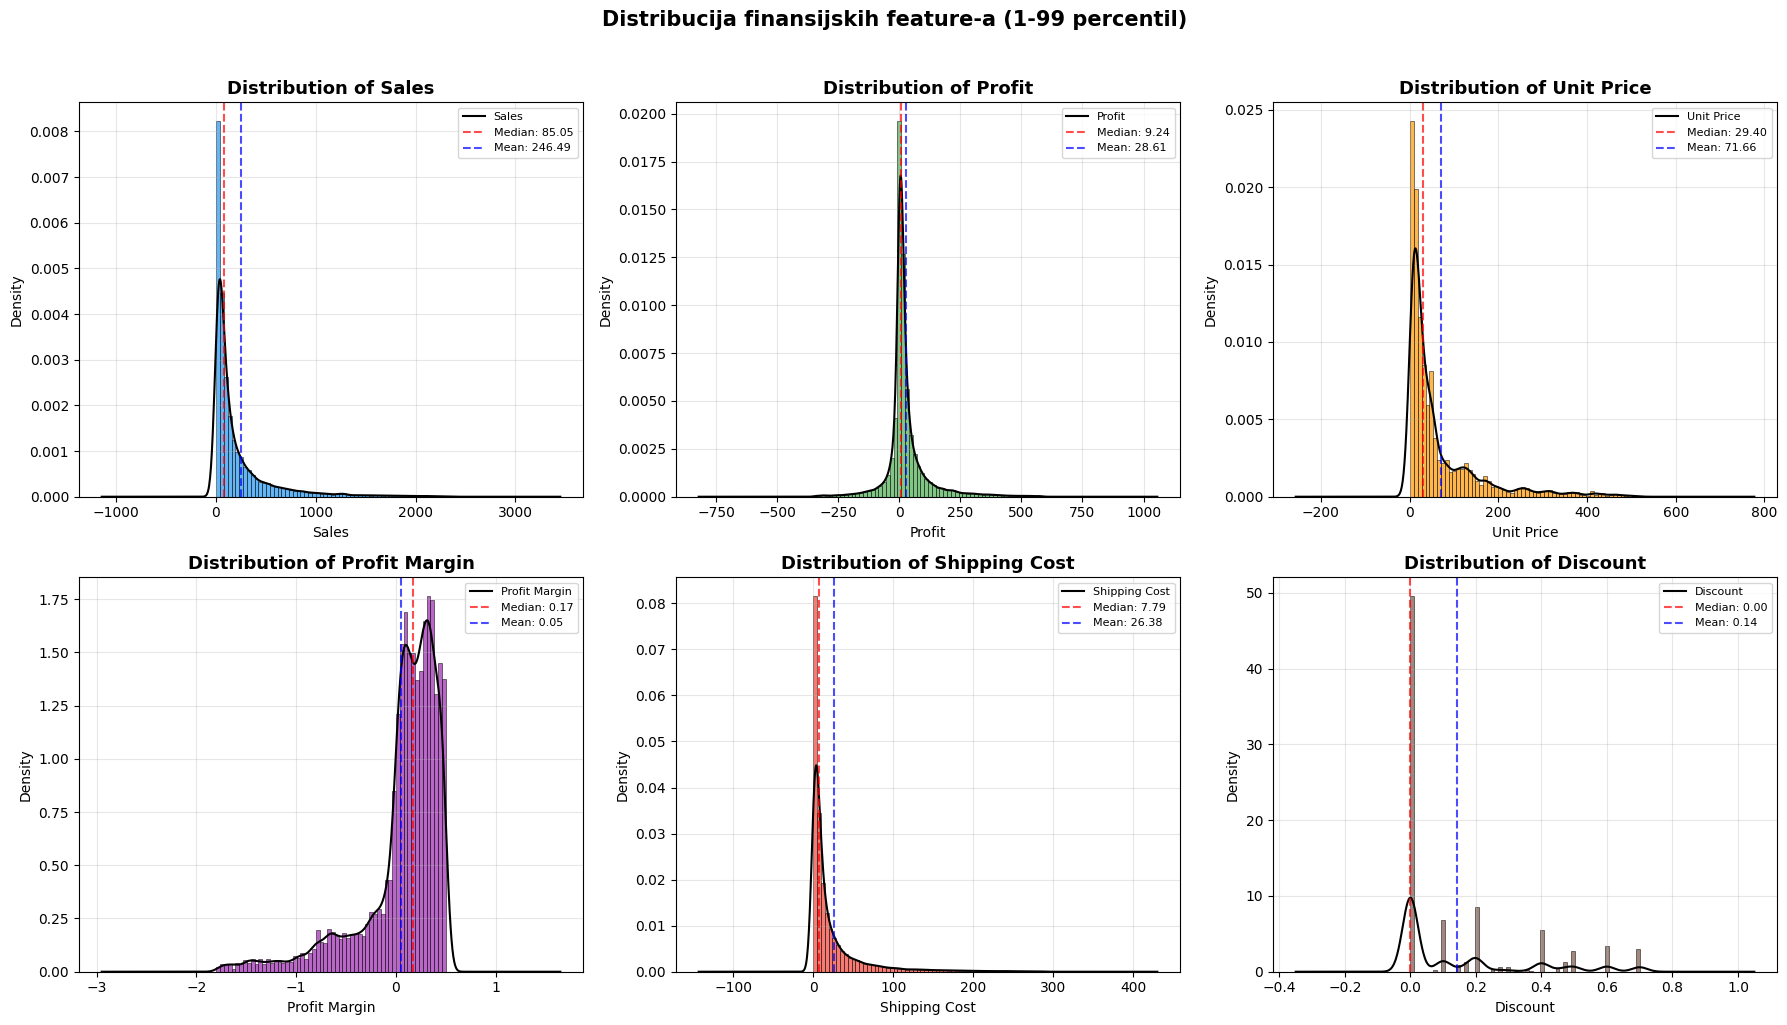

In [76]:
# Distribution plots for Sales, Profit, and Unit Price (log scale for skewed data)
from matplotlib import pyplot as plt


fig, axes = plt.subplots(2, 3, figsize=(18, 10))

features = ['Sales', 'Profit', 'Unit Price', 'Profit Margin', 'Shipping Cost', 'Discount']
colors = ['#2196F3', '#4CAF50', '#FF9800', '#9C27B0', '#F44336', '#795548']

for idx, (feat, color) in enumerate(zip(features, colors)):
    row, col = idx // 3, idx % 3
    ax = axes[row][col]
    data = df_analysis[feat].dropna()
    
    # Remove extreme outliers for better visualization (keep 1st-99th percentile)
    q_low, q_high = data.quantile(0.01), data.quantile(0.99)
    data_trimmed = data[(data >= q_low) & (data <= q_high)]
    
    ax.hist(data_trimmed, bins=60, color=color, alpha=0.7, edgecolor='black', linewidth=0.5, density=True)
    data_trimmed.plot.kde(ax=ax, color='black', linewidth=1.5)
    ax.set_title(f'Distribution of {feat}', fontsize=13, fontweight='bold')
    ax.set_xlabel(feat)
    ax.set_ylabel('Density')
    ax.axvline(data.median(), color='red', linestyle='--', alpha=0.7, label=f'Median: {data.median():.2f}')
    ax.axvline(data.mean(), color='blue', linestyle='--', alpha=0.7, label=f'Mean: {data.mean():.2f}')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.suptitle('Distribucija finansijskih feature-a (1-99 percentil)', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

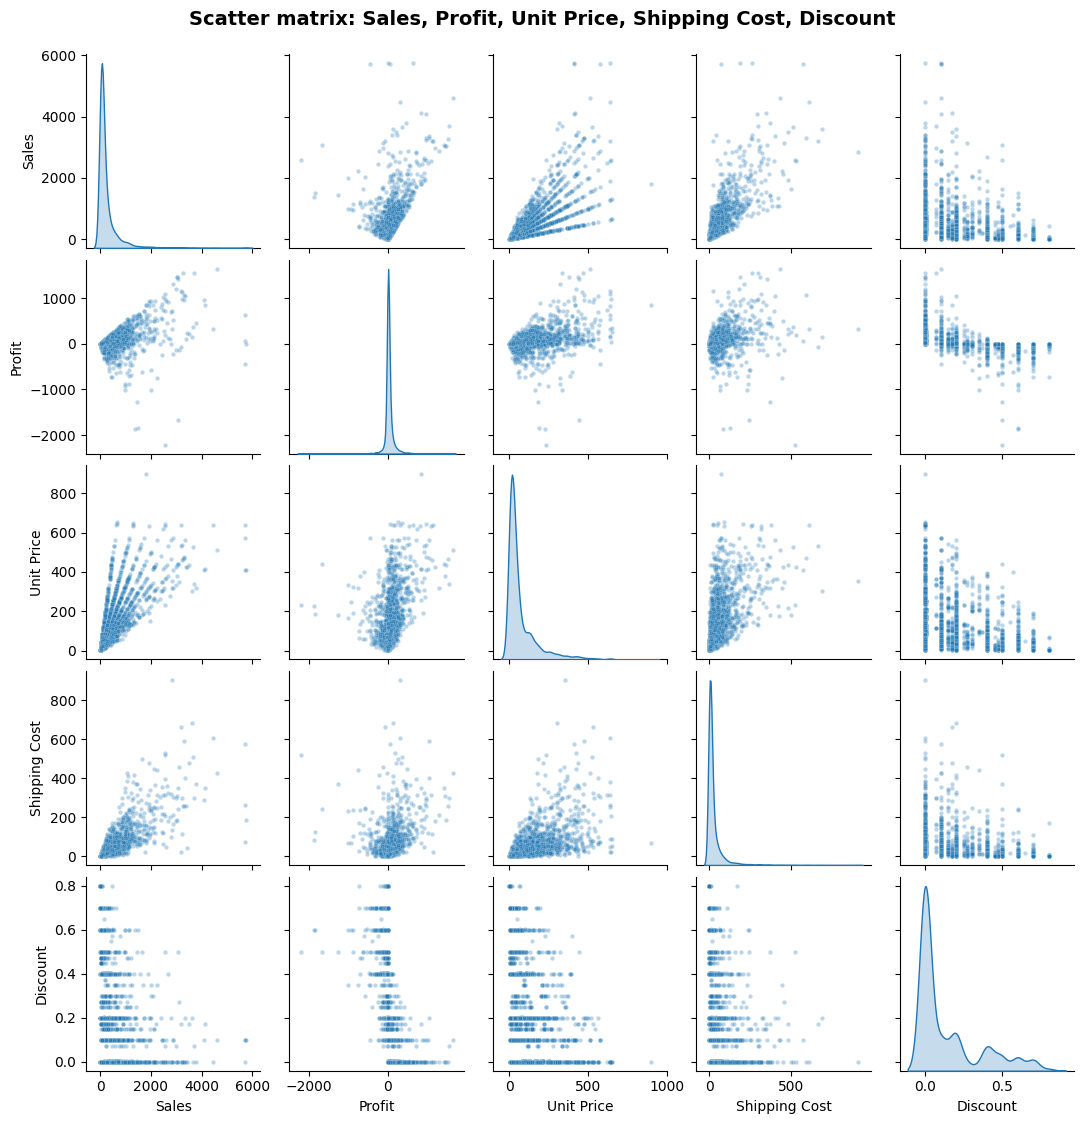

In [77]:
# Pairplot / Scatter matrix of key financial features
import seaborn as sns
import matplotlib.pyplot as plt

pair_cols = ['Sales', 'Profit', 'Unit Price', 'Shipping Cost', 'Discount']
sample = df_analysis[pair_cols].sample(n=min(5000, len(df_analysis)), random_state=42)

g = sns.pairplot(sample, diag_kind='kde', plot_kws={'alpha': 0.3, 's': 10}, height=2.2)
g.figure.suptitle('Scatter matrix: Sales, Profit, Unit Price, Shipping Cost, Discount', y=1.02, fontsize=14, fontweight='bold')
plt.show()

C:\Users\jelen\AppData\Local\Temp\ipykernel_18708\3679209378.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount Bin', y='Profit', data=df_analysis, ax=axes[0], showfliers=False, palette='RdYlGn_r')
C:\Users\jelen\AppData\Local\Temp\ipykernel_18708\3679209378.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount Bin', y='Profit Margin', data=df_analysis, ax=axes[1], showfliers=False, palette='RdYlGn_r')
C:\Users\jelen\AppData\Local\Temp\ipykernel_18708\3679209378.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futur

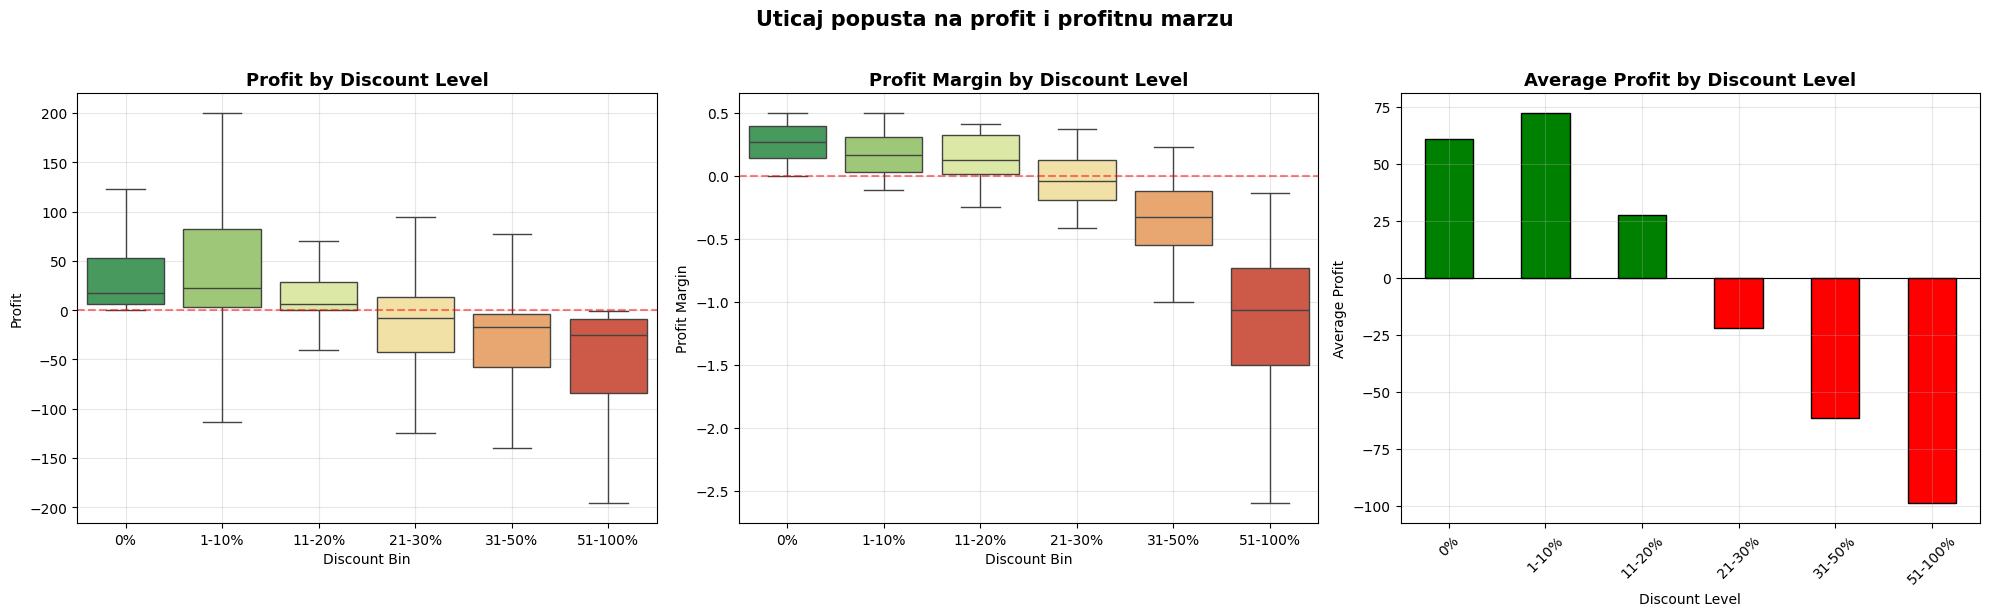

In [78]:
# Impact of Discount on Profit and Profit Margin
df_analysis['Discount Bin'] = pd.cut(df_analysis['Discount'], bins=[-0.01, 0, 0.1, 0.2, 0.3, 0.5, 1.0],
                                      labels=['0%', '1-10%', '11-20%', '21-30%', '31-50%', '51-100%'])

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Boxplot: Profit by Discount Bin
sns.boxplot(x='Discount Bin', y='Profit', data=df_analysis, ax=axes[0], showfliers=False, palette='RdYlGn_r')
axes[0].set_title('Profit by Discount Level', fontsize=13, fontweight='bold')
axes[0].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[0].set_ylabel('Profit')
axes[0].grid(True, alpha=0.3)

# Boxplot: Profit Margin by Discount Bin
sns.boxplot(x='Discount Bin', y='Profit Margin', data=df_analysis, ax=axes[1], showfliers=False, palette='RdYlGn_r')
axes[1].set_title('Profit Margin by Discount Level', fontsize=13, fontweight='bold')
axes[1].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[1].set_ylabel('Profit Margin')
axes[1].grid(True, alpha=0.3)

# Bar chart: Average Profit by Discount Bin
avg_profit = df_analysis.groupby('Discount Bin')['Profit'].mean()
colors = ['green' if v > 0 else 'red' for v in avg_profit.values]
avg_profit.plot(kind='bar', ax=axes[2], color=colors, edgecolor='black')
axes[2].set_title('Average Profit by Discount Level', fontsize=13, fontweight='bold')
axes[2].axhline(0, color='black', linestyle='-', linewidth=0.8)
axes[2].set_ylabel('Average Profit')
axes[2].set_xlabel('Discount Level')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

plt.suptitle('Uticaj popusta na profit i profitnu marzu', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [79]:
# Drop customer name and product name columns
name_columns = ['Customer Name', 'Product Name']
df = df.drop(columns=name_columns)

print(f"Dropped columns: {name_columns}")
print(f"\nRemaining columns: {list(df.columns)}")

Dropped columns: ['Customer Name', 'Product Name']

Remaining columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Segment', 'City', 'State', 'Country', 'Postal Code', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Segment         51290 non-null  object 
 7   City            51290 non-null  object 
 8   State           51290 non-null  object 
 9   Country         51290 non-null  object 
 10  Postal Code     9994 non-null   float64
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Sales           51290 non-null  float64
 17  Quantity        51290 non-null 

In [81]:
# Analyze cardinality of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Cardinality Analysis for Categorical Columns:")
print("=" * 60)
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col:20} | Unique values: {unique_count:5} | Sample: {df[col].iloc[0]}")

Cardinality Analysis for Categorical Columns:
Order ID             | Unique values: 25035 | Sample: CA-2012-124891
Order Date           | Unique values:  1430 | Sample: 31-07-2012
Ship Date            | Unique values:  1464 | Sample: 31-07-2012
Ship Mode            | Unique values:     4 | Sample: Same Day
Customer ID          | Unique values:  1590 | Sample: RH-19495
Segment              | Unique values:     3 | Sample: Consumer
City                 | Unique values:  3636 | Sample: New York City
State                | Unique values:  1094 | Sample: New York
Country              | Unique values:   147 | Sample: United States
Market               | Unique values:     7 | Sample: US
Region               | Unique values:    13 | Sample: East
Product ID           | Unique values: 10292 | Sample: TEC-AC-10003033
Category             | Unique values:     3 | Sample: Technology
Sub-Category         | Unique values:    17 | Sample: Accessories
Order Priority       | Unique values:     4 | Samp

In [82]:
id_columns = [col for col in df.columns if 'ID' in col.upper()]
df = df.drop(columns=id_columns)

date_columns = ['Order Date', 'Ship Date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col]) #.astype('int64') // 10**6

df['Lead_Time'] = (df['Ship Date'] - df['Order Date']).dt.days

print(f"Dropped columns: {id_columns}")


Dropped columns: ['Row ID', 'Order ID', 'Customer ID', 'Product ID']


C:\Users\jelen\AppData\Local\Temp\ipykernel_18708\2051795891.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col]) #.astype('int64') // 10**6
C:\Users\jelen\AppData\Local\Temp\ipykernel_18708\2051795891.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col]) #.astype('int64') // 10**6


In [83]:
# Analyze cardinality of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Cardinality Analysis for Categorical Columns:")
print("=" * 60)
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col:20} | Unique values: {unique_count:5} | Sample: {df[col].iloc[0]}")

Cardinality Analysis for Categorical Columns:
Ship Mode            | Unique values:     4 | Sample: Same Day
Segment              | Unique values:     3 | Sample: Consumer
City                 | Unique values:  3636 | Sample: New York City
State                | Unique values:  1094 | Sample: New York
Country              | Unique values:   147 | Sample: United States
Market               | Unique values:     7 | Sample: US
Region               | Unique values:    13 | Sample: East
Category             | Unique values:     3 | Sample: Technology


Sub-Category         | Unique values:    17 | Sample: Accessories
Order Priority       | Unique values:     4 | Sample: Critical


In [84]:
#'City', 'Postal Code',
categorical_geo = [ 'State', 'Country', 'Region', 'Market']

for col in categorical_geo:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())


Value counts for column: State
State
California            2001
England               1499
New York              1128
Texas                  985
Ile-de-France          981
                      ... 
Caras-Severin            1
Pernik                   1
Edirne                   1
Kabarole                 1
Matabeleland North       1
Name: count, Length: 1094, dtype: int64

Value counts for column: Country
Country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
South Sudan         2
Bahrain             2
Swaziland           2
Burundi             2
Eritrea             2
Name: count, Length: 147, dtype: int64

Value counts for column: Region
Region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       204

<Axes: xlabel='Market', ylabel='Count'>

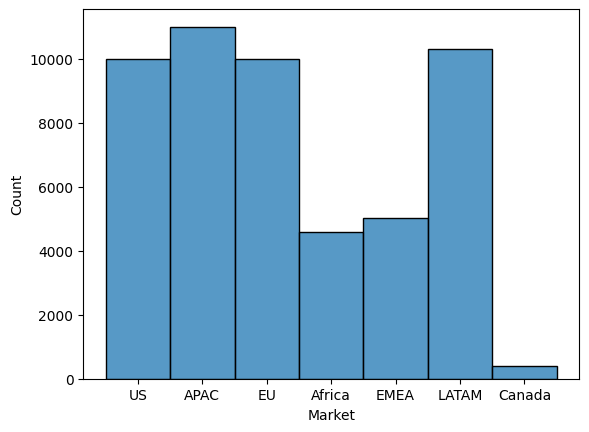

In [85]:
plt.figure()
sns.histplot(data=df, x='Market')

In [86]:
def merge_geo(row):
    # Spajanje Kanade sa US radi smanjenja outliera
    if row['Market'] == 'Canada' or row['Market'] == 'US':
        return 'North_America'
    
    # Za velike markete dodajemo regiju radi preciznosti
    if row['Market'] in ['APAC', 'LATAM', 'EU']:
        return f"{row['Market']}_{row['Region']}"
    
    # Za ostale (EMEA, Africa) ostavljamo samo Market
    return row['Market']

#df = df1.copy()
#df1 = df.copy()
#df['Unified_Market'] = df.apply(merge_geo, axis=1)

In [87]:
categorical_cols = ['State', 'Country', 'Region', 'Market']#, 'Unified_Market'

for col in categorical_cols:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())


Value counts for column: State
State
California            2001
England               1499
New York              1128
Texas                  985
Ile-de-France          981
                      ... 
Caras-Severin            1
Pernik                   1
Edirne                   1
Kabarole                 1
Matabeleland North       1
Name: count, Length: 1094, dtype: int64

Value counts for column: Country
Country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
South Sudan         2
Bahrain             2
Swaziland           2
Burundi             2
Eritrea             2
Name: count, Length: 147, dtype: int64

Value counts for column: Region
Region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       204

In [88]:
# Drop high-cardinality columns not useful for clustering
high_cardinality_cols = ['City', 'Postal Code', 'State', 'Country',  'Region']
#'Ship Date', 'Order Date', 'Region',  'Category', 'Sub-Category''Market',

df = df.drop(columns=high_cardinality_cols)

print(f"Dropped columns: {high_cardinality_cols}")
print(f"\nRemaining categorical columns:")
remaining_categorical = df.select_dtypes(include=['object']).columns.tolist()
print(remaining_categorical)

Dropped columns: ['City', 'Postal Code', 'State', 'Country', 'Region']

Remaining categorical columns:
['Ship Mode', 'Segment', 'Market', 'Category', 'Sub-Category', 'Order Priority']


<Axes: xlabel='Ship Mode', ylabel='Count'>

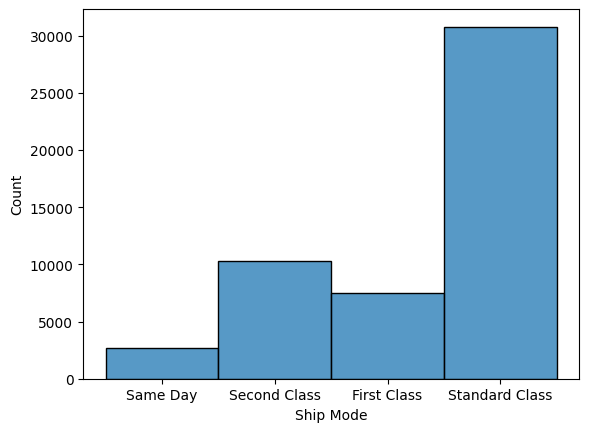

In [89]:
plt.figure()
sns.histplot(data=df, x='Ship Mode')

In [90]:
# Uporedi vrenosti u preostalim kategorijskim kolonama
for col in remaining_categorical:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())


Value counts for column: Ship Mode
Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

Value counts for column: Segment
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

Value counts for column: Market
Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64

Value counts for column: Category
Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

Value counts for column: Sub-Category
Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables

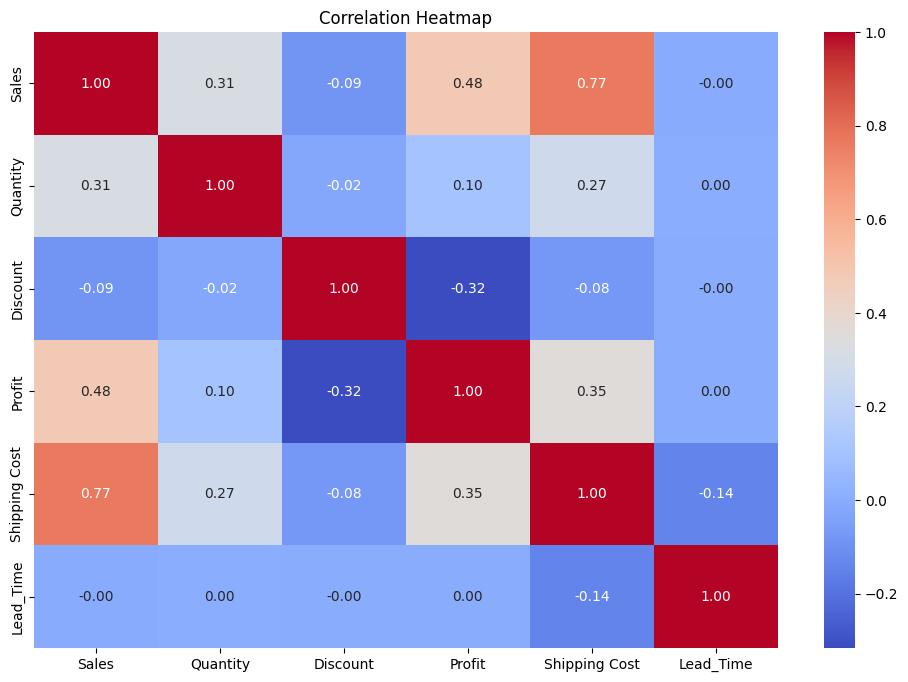

In [91]:
numeric_df = df.select_dtypes(include=[np.number, np.bool_])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [92]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Order Priority -> Ordinal (ima prirodni redosljed)
order_priority_map = {'Low': 0, 'Medium': 1, 'High': 2, 'Critical': 3}
df['Order Priority'] = df['Order Priority'].map(order_priority_map).astype('Int64')


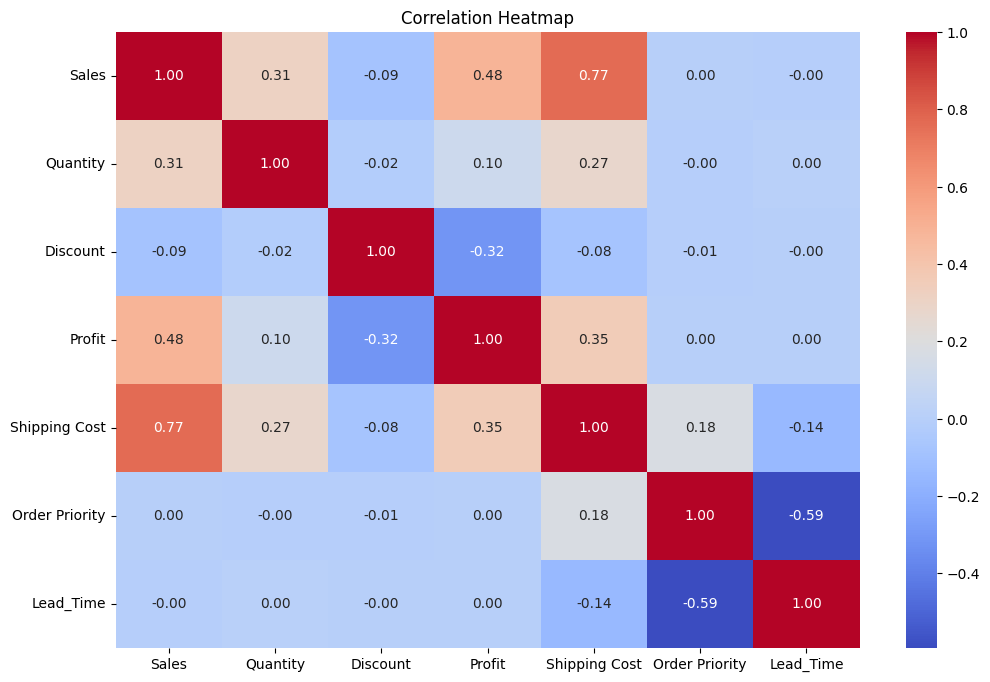

In [93]:
numeric_df = df.select_dtypes(include=[np.number, np.bool_])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [94]:

remaining_categorical = df.select_dtypes(include=['object']).columns.tolist()
for col in remaining_categorical:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())


Value counts for column: Ship Mode
Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

Value counts for column: Segment
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

Value counts for column: Market
Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64

Value counts for column: Category
Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

Value counts for column: Sub-Category
Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
# Bucket Market into Continent, then one-hot encode categorical features


df_cluster = df.copy()

# Bucket Market into Continent
continent_map = {
    'US': 'North America',
    'Canada': 'North America',
    'LATAM': 'South America',
    'EU': 'Europe',
    'EMEA': 'Middle East',
    'Africa': 'Africa',
    'APAC': 'Asia Pacific'
}
df_cluster['Continent'] = df_cluster['Market'].map(continent_map)

# One-hot encode: Continent, Ship Mode, Segment
ohe_cols = [ 'Ship Mode', 'Segment', 'Continent']#
df_ohe = pd.get_dummies(df_cluster[ohe_cols], drop_first=True)

# Drop the original columns + Market
df_cluster = df_cluster.drop(columns=ohe_cols + ['Market'])#

# Add the one-hot encoded columns
df_cluster = pd.concat([df_cluster, df_ohe], axis=1)

# Label encode remaining categorical columns (Category, Sub-Category, Order Priority)
remaining_cat = df_cluster.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in remaining_cat:
    # Skip Category and Sub-Category - keep them as categorical
    if col in ['Category', 'Sub-Category']:
        continue
    le = LabelEncoder()
    df_cluster[col] = le.fit_transform(df_cluster[col].astype(str))
    label_encoders[col] = le
    print(f"Label Encoded {col}: {le.classes_}")

print(f"\nOne-hot encoded: {ohe_cols}")
print(f"Label encoded: {remaining_cat}")
print(f"\nFinal columns ({len(df_cluster.columns)}):")
print(list(df_cluster.columns))
df_cluster.head()


One-hot encoded: ['Ship Mode', 'Segment', 'Continent']
Label encoded: ['Category', 'Sub-Category']

Final columns (21):
['Order Date', 'Ship Date', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Lead_Time', 'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'Segment_Corporate', 'Segment_Home Office', 'Continent_Asia Pacific', 'Continent_Europe', 'Continent_Middle East', 'Continent_North America', 'Continent_South America']


,Order Date,Ship Date,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,...,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Continent_Asia Pacific,Continent_Europe,Continent_Middle East,Continent_North America,Continent_South America
0,2012-07-31,2012-07-31,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,3,...,True,False,False,False,False,False,False,False,True,False
1,2013-02-05,2013-02-07,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,3,...,False,True,False,True,False,True,False,False,False,False
2,2013-10-17,2013-10-18,Technology,Phones,5175.171,9,0.1,919.9710,915.49,1,...,False,False,False,False,False,True,False,False,False,False
3,2013-01-28,2013-01-30,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,1,...,False,False,False,False,True,False,True,False,False,False
4,2013-11-05,2013-11-06,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,3,...,True,False,False,False,False,False,False,False,False,False


In [97]:
# Grupisavanje retkih Sub-Category
subcat_counts = df_cluster['Sub-Category'].value_counts()
rare_subcats = subcat_counts[subcat_counts < 100].index  # Prilagodite limit

df_cluster['Sub-Category_grouped'] = df_cluster['Sub-Category'].apply(
    lambda x: x if x not in rare_subcats else 'Other'
)

print(f"Originalno Sub-Category: {df_cluster['Sub-Category'].nunique()} vrednosti")
print(f"Grupisano Sub-Category: {df_cluster['Sub-Category_grouped'].nunique()} vrednosti")

#df_cluster = df_cluster[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 
#                         'Category', 'Sub-Category_grouped']].copy()

# Pripremi za klasteriranje
df_encoded = pd.get_dummies(df_cluster, 
                             columns=['Sub-Category_grouped'], 
                             drop_first=True)

ohe_cols = [ 'Sub-Category_grouped', 'Category' ]#
df_ohe = pd.get_dummies(df_cluster[ohe_cols], drop_first=True)

df_cluster = df_cluster.drop(columns=['Sub-Category','Sub-Category_grouped', 'Category' ])#

df_cluster = pd.concat([df_cluster, df_ohe], axis=1)



print(list(df_cluster.columns))
df_cluster.head()

Originalno Sub-Category: 17 vrednosti
Grupisano Sub-Category: 17 vrednosti
['Order Date', 'Ship Date', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Lead_Time', 'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'Segment_Corporate', 'Segment_Home Office', 'Continent_Asia Pacific', 'Continent_Europe', 'Continent_Middle East', 'Continent_North America', 'Continent_South America', 'Sub-Category_grouped_Appliances', 'Sub-Category_grouped_Art', 'Sub-Category_grouped_Binders', 'Sub-Category_grouped_Bookcases', 'Sub-Category_grouped_Chairs', 'Sub-Category_grouped_Copiers', 'Sub-Category_grouped_Envelopes', 'Sub-Category_grouped_Fasteners', 'Sub-Category_grouped_Furnishings', 'Sub-Category_grouped_Labels', 'Sub-Category_grouped_Machines', 'Sub-Category_grouped_Paper', 'Sub-Category_grouped_Phones', 'Sub-Category_grouped_Storage', 'Sub-Category_grouped_Supplies', 'Sub-Category_grouped_Tables', 'Category_Office Supplies', 'Category_Techno

,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Lead_Time,Ship Mode_Same Day,...,Sub-Category_grouped_Furnishings,Sub-Category_grouped_Labels,Sub-Category_grouped_Machines,Sub-Category_grouped_Paper,Sub-Category_grouped_Phones,Sub-Category_grouped_Storage,Sub-Category_grouped_Supplies,Sub-Category_grouped_Tables,Category_Office Supplies,Category_Technology
0,2012-07-31,2012-07-31,2309.650,7,0.0,762.1845,933.57,3,0,True,...,False,False,False,False,False,False,False,False,False,True
1,2013-02-05,2013-02-07,3709.395,9,0.1,-288.7650,923.63,3,2,False,...,False,False,False,False,False,False,False,False,False,False
2,2013-10-17,2013-10-18,5175.171,9,0.1,919.9710,915.49,1,1,False,...,False,False,False,False,True,False,False,False,False,True
3,2013-01-28,2013-01-30,2892.510,5,0.1,-96.5400,910.16,1,2,False,...,False,False,False,False,True,False,False,False,False,True
4,2013-11-05,2013-11-06,2832.960,8,0.0,311.5200,903.04,3,1,True,...,False,False,False,False,False,False,False,False,False,True


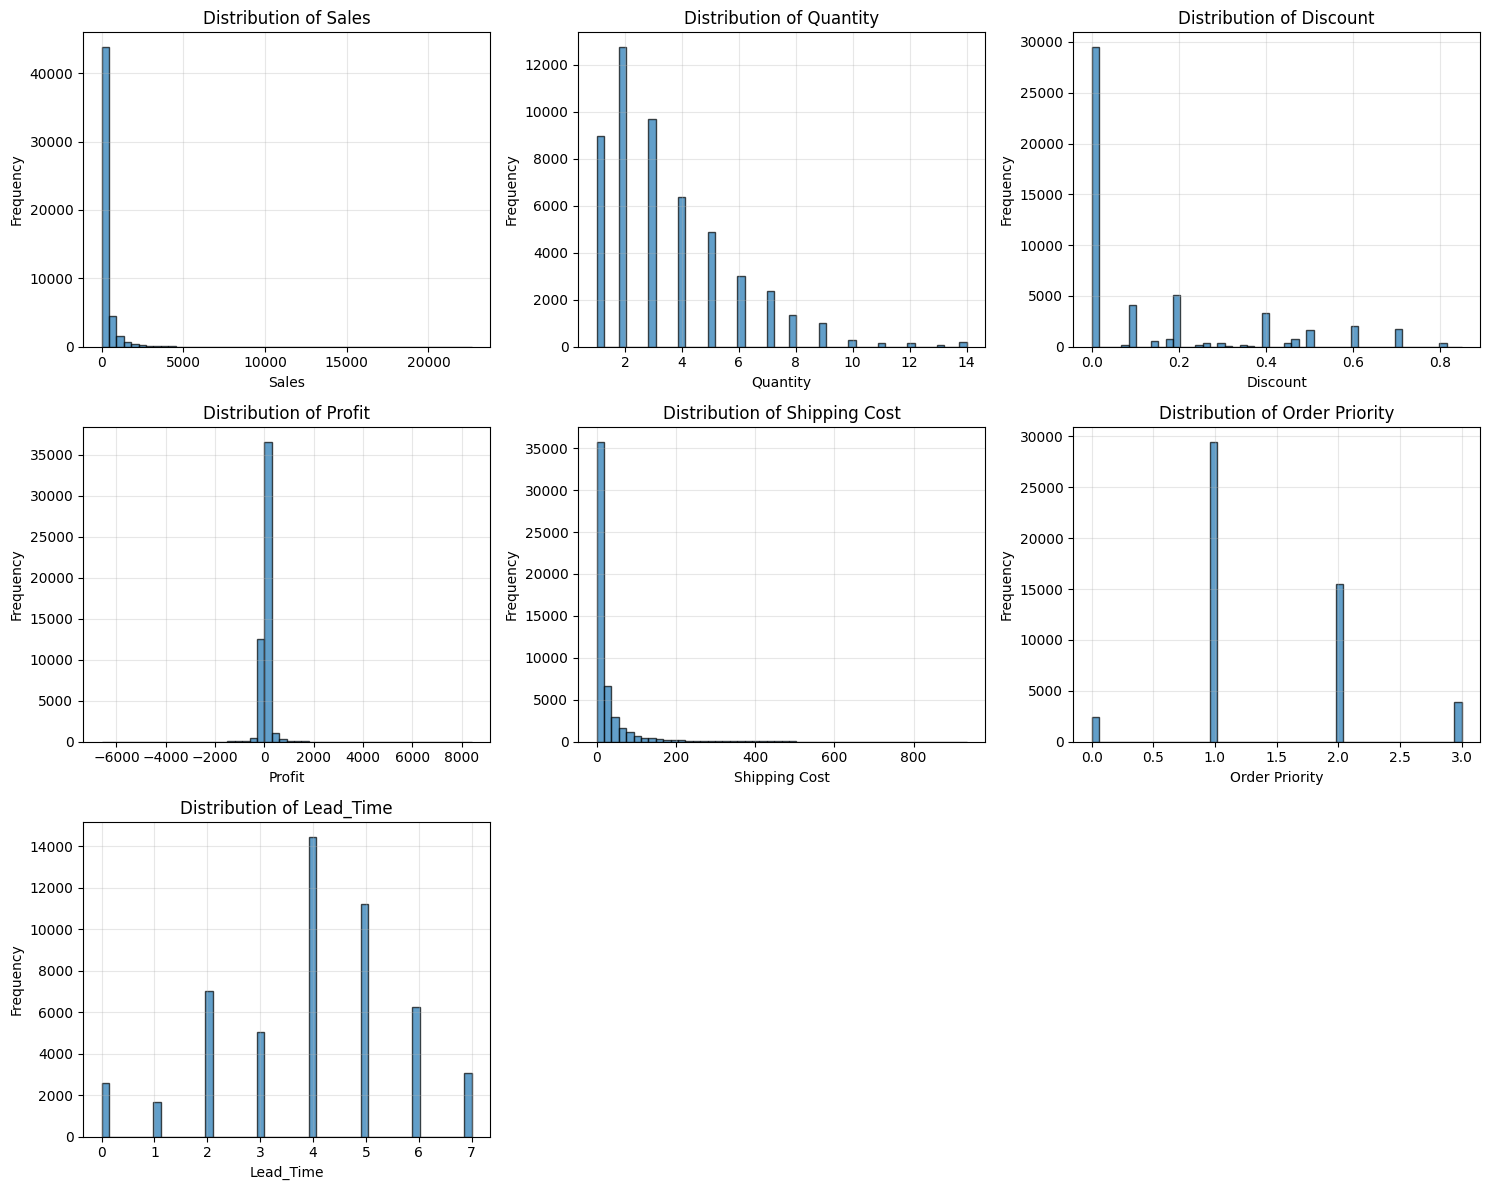

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df_cluster.select_dtypes(include=[np.number]).columns.tolist()

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df_cluster[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [99]:
def outliers_iqr(x: pd.Series):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))[0]

def outliers_z_score(ys: pd.Series):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)[0]

def outliers_modified_z_score(ys: pd.Series):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    
    if median_absolute_deviation_y == 0:
        median_absolute_deviation_y = np.finfo(np.double).min
    
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)[0]


outliers = {}
print("Outliers:",' ' * 26,"IQR ZScore ModZScore")
numerical_features = df_cluster.select_dtypes(include=[np.number, np.bool_]).columns.tolist()
# Convert boolean columns to integers for outlier detection
df_cluster_bool = df_cluster.copy()
bool_cols = df_cluster_bool.select_dtypes(include=[np.bool_]).columns
for col in bool_cols:
    df_cluster_bool[col] = df_cluster_bool[col].astype(int)

for col in numerical_features:
    outliersIQR = outliers_iqr(df_cluster_bool[col])
    outliersZScore = outliers_z_score(df_cluster_bool[col])
    outliersModZScore = outliers_modified_z_score(df_cluster_bool[col])
    outliers[col] = (outliersIQR, outliersZScore, outliersModZScore)
    print(f"Column '{col:24}': {len(outliersIQR):5} {len(outliersZScore):6} {len(outliersModZScore):9}")

Outliers:                            IQR ZScore ModZScore
Column 'Sales                   ':  5655   1020      7829
Column 'Quantity                ':   877    601      1864
Column 'Discount                ':  4172    318         0
Column 'Profit                  ':  9755    865      9109
Column 'Shipping Cost           ':  5909   1041      8237
Column 'Order Priority          ':     0      0         0
Column 'Lead_Time               ':     0      0         0
Column 'Ship Mode_Same Day      ':  2701   2701         0
Column 'Ship Mode_Second Class  ': 10309      0         0
Column 'Ship Mode_Standard Class':     0      0         0
Column 'Segment_Corporate       ':     0      0         0
Column 'Segment_Home Office     ':  9343      0         0
Column 'Continent_Asia Pacific  ': 11002      0         0
Column 'Continent_Europe        ': 10000      0         0
Column 'Continent_Middle East   ':  5029   5029         0
Column 'Continent_North America ': 10378      0         0
Column 'Contin

In [100]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Ensure required columns exist
if 'Unit_Price' not in df.columns:
    df['Unit_Price'] = df['Sales'] / df['Quantity']

# Lead time from datetime or numeric dates
if 'Lead_Time' not in df.columns and {'Order Date', 'Ship Date'}.issubset(df.columns):
    if pd.api.types.is_datetime64_any_dtype(df['Order Date']) and pd.api.types.is_datetime64_any_dtype(df['Ship Date']):
        df['Lead_Time'] = (df['Ship Date'] - df['Order Date']).dt.days
    else:
        # Assume numeric epoch milliseconds
        df['Lead_Time'] = ((df['Ship Date'] - df['Order Date']) / (1000 * 60 * 60 * 24)).round().astype('Int64')

# Convert datetime columns to numeric (ms) to avoid dtype promotion errors
for col in ['Order Date', 'Ship Date']:
    if col in df.columns and pd.api.types.is_datetime64_any_dtype(df[col]):
        df[col] = df[col].astype('int64') // 10**6

# 1. Define column groups
robust_cols = ['Sales', 'Shipping Cost']
standard_cols = ['Profit', 'Unit_Price']
minmax_cols = ['Discount', 'Lead_Time', 'Order Date', 'Ship Date']

# Keep only columns that exist in the dataframe
existing_cols = set(df.columns)
robust_cols = [col for col in robust_cols if col in existing_cols]
standard_cols = [col for col in standard_cols if col in existing_cols]
minmax_cols = [col for col in minmax_cols if col in existing_cols]

print("Robust cols:", robust_cols)
print("Standard cols:", standard_cols)
print("MinMax cols:", minmax_cols)

# 2. Create transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('rob', RobustScaler(), robust_cols),
        ('std', StandardScaler(), standard_cols),
        ('mm', MinMaxScaler(), minmax_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
 )

# 3. Apply
X_scaled = preprocessor.fit_transform(df)

#df_cluster = pd.DataFrame(X_scaled, columns=preprocessor.get_feature_names_out())

Robust cols: ['Sales', 'Shipping Cost']
Standard cols: ['Profit', 'Unit_Price']
MinMax cols: ['Discount', 'Lead_Time', 'Order Date', 'Ship Date']


In [101]:
## Prepare data for clustering - remove nulls and scale
#from sklearn.preprocessing import StandardScaler
#
#df_cluster_clean = df_cluster.dropna()
##df_cluster_clean = df_cluster_clean[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']]
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(df_cluster_clean)
#
#print(f"Shape of data for clustering: {X_scaled.shape}")
#print(f"Number of features: {X_scaled.shape[1]}")
#print(f"Number of samples: {X_scaled.shape[0]}")

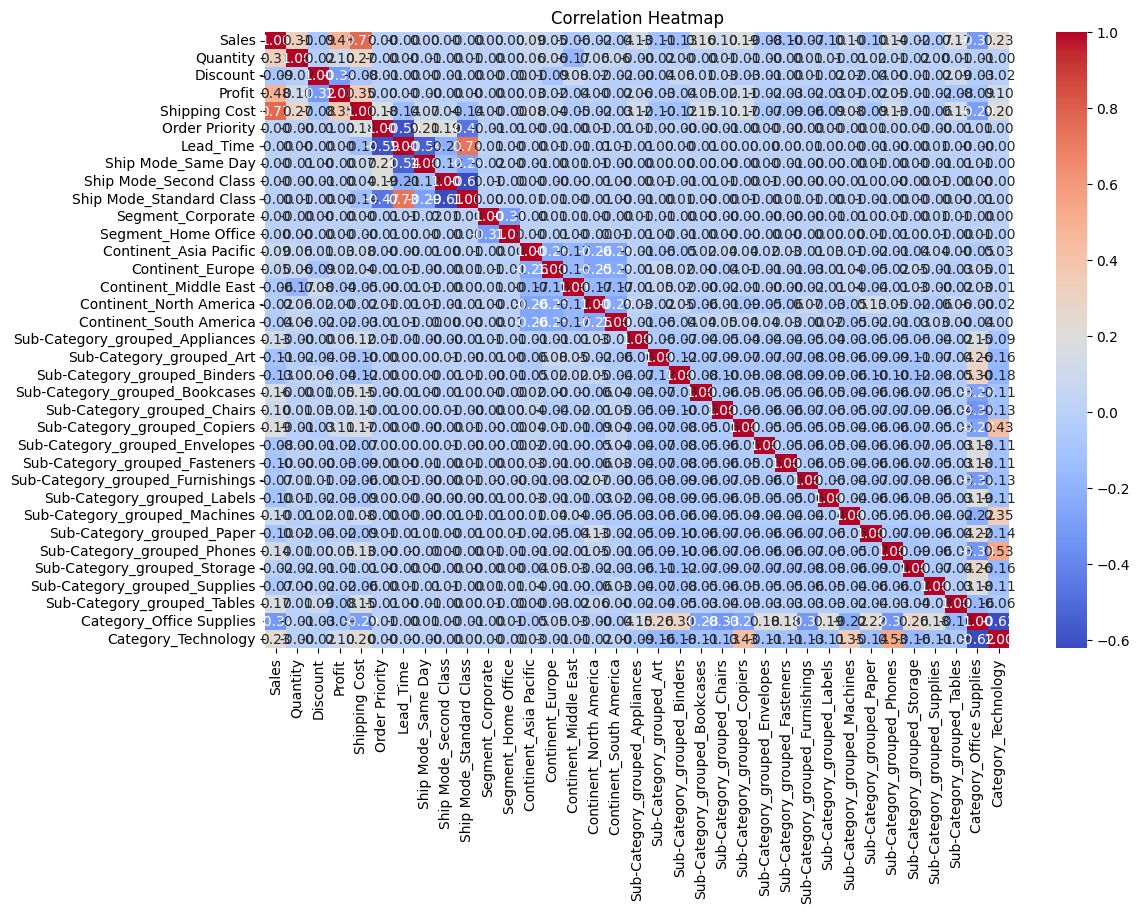

In [102]:
numeric_df = df_cluster.select_dtypes(include=[np.number, np.bool_])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [105]:
# Analyze cardinality of  columns
categorical_cols = X_scaled.columns

print("Cardinality Analysis for Categorical Columns:")
print("=" * 60)
for col in categorical_cols:
    unique_count = X_scaled[col].nunique()
    print(f"{col:20} | Unique values: {unique_count:5} | Sample: {X_scaled[col].iloc[0]}")

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [103]:
# K-Means: Find optimal k using elbow method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.grid(True)

plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'Same Day'

In [ ]:
# Apply K-Means with optimal k
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster_clean['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

print(f"K-Means Clustering with k={optimal_k}")
print("\nCluster distribution:")
print(df_cluster_clean['KMeans_Cluster'].value_counts().sort_index())

K-Means Clustering with k=3

Cluster distribution:
KMeans_Cluster
0    38226
1     2418
2    10646
Name: count, dtype: int64


In [ ]:
cluster_col = 'KMeans_Cluster'
profile = df_cluster_clean.groupby(cluster_col)[
    ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
].mean()
print(profile.round(2))

                  Sales  Quantity  Discount  Profit  Shipping Cost
KMeans_Cluster                                                    
0                176.27      3.35      0.04   34.73          17.66
1               1804.49      5.96      0.06  388.91         213.69
2                144.77      3.36      0.52  -75.19          15.12


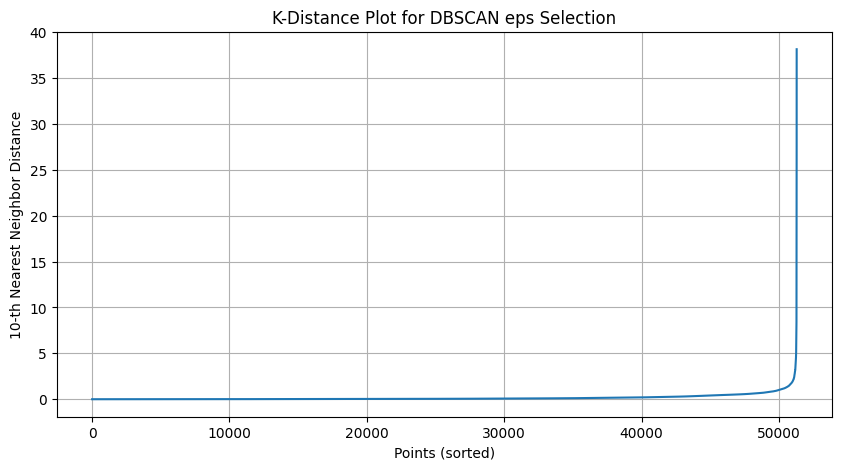

Selected eps: 0.9094, min_samples: 10

DBSCAN Clustering (eps=0.9094, min_samples=10)

Cluster distribution:
DBSCAN_Cluster
-1     1090
 0       10
 1    50190
Name: count, dtype: int64

Number of noise points (label=-1): 1090
Number of clusters found: 2


In [ ]:
# Apply DBSCAN - use k-distance plot to find optimal eps
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Rule of thumb: min_samples = 2 * n_features
min_samples = 2 * X_scaled.shape[1]

# Compute k-nearest neighbor distances to find eps
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, _ = nn.kneighbors(X_scaled)
k_distances = np.sort(distances[:, -1])

# Plot k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(k_distances)
plt.xlabel('Points (sorted)')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.title('K-Distance Plot for DBSCAN eps Selection')
plt.grid(True)
plt.show()

# Use the elbow/knee of the curve as eps
# A good heuristic: find where the rate of change increases sharply
eps_value = np.percentile(k_distances, 97)
print(f"Selected eps: {eps_value:.4f}, min_samples: {min_samples}")

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
df_cluster_clean['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

print(f"\nDBSCAN Clustering (eps={eps_value:.4f}, min_samples={min_samples})")
print("\nCluster distribution:")
print(df_cluster_clean['DBSCAN_Cluster'].value_counts().sort_index())
print(f"\nNumber of noise points (label=-1): {(df_cluster_clean['DBSCAN_Cluster'] == -1).sum()}")
print(f"Number of clusters found: {len(set(df_cluster_clean['DBSCAN_Cluster'])) - (1 if -1 in df_cluster_clean['DBSCAN_Cluster'].values else 0)}")

In [ ]:
# Apply Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df_cluster_clean['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

print(f"Hierarchical Clustering with {n_clusters} clusters")
print("\nCluster distribution:")
print(df_cluster_clean['Hierarchical_Cluster'].value_counts().sort_index())

Hierarchical Clustering with 3 clusters

Cluster distribution:
Hierarchical_Cluster
0    36413
1     4591
2    10286
Name: count, dtype: int64


In [ ]:
# Compare clustering algorithms
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

results = []

# K-Means metrics
kmeans_silhouette = silhouette_score(X_scaled, df_cluster_clean['KMeans_Cluster'])
kmeans_calinski = calinski_harabasz_score(X_scaled, df_cluster_clean['KMeans_Cluster'])
kmeans_davies = davies_bouldin_score(X_scaled, df_cluster_clean['KMeans_Cluster'])
results.append(['K-Means', kmeans_silhouette, kmeans_calinski, kmeans_davies])

# DBSCAN metrics (excluding noise)
dbscan_mask = df_cluster_clean['DBSCAN_Cluster'] != -1
n_dbscan_clusters = df_cluster_clean.loc[dbscan_mask, 'DBSCAN_Cluster'].nunique()

if dbscan_mask.sum() > 0 and n_dbscan_clusters >= 2:
    dbscan_silhouette = silhouette_score(X_scaled[dbscan_mask], df_cluster_clean.loc[dbscan_mask, 'DBSCAN_Cluster'])
    dbscan_calinski = calinski_harabasz_score(X_scaled[dbscan_mask], df_cluster_clean.loc[dbscan_mask, 'DBSCAN_Cluster'])
    dbscan_davies = davies_bouldin_score(X_scaled[dbscan_mask], df_cluster_clean.loc[dbscan_mask, 'DBSCAN_Cluster'])
    results.append(['DBSCAN', dbscan_silhouette, dbscan_calinski, dbscan_davies])
else:
    print(f"\nWarning: DBSCAN found only {n_dbscan_clusters} cluster(s). Skipping metrics calculation.")
    results.append(['DBSCAN', None, None, None])

# Hierarchical metrics
hier_silhouette = silhouette_score(X_scaled, df_cluster_clean['Hierarchical_Cluster'])
hier_calinski = calinski_harabasz_score(X_scaled, df_cluster_clean['Hierarchical_Cluster'])
hier_davies = davies_bouldin_score(X_scaled, df_cluster_clean['Hierarchical_Cluster'])
results.append(['Hierarchical', hier_silhouette, hier_calinski, hier_davies])

comparison_df = pd.DataFrame(results, columns=['Algorithm', 'Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin'])
print("CLUSTERING ALGORITHM COMPARISON")
print("="*80)
print("\n" + "="*80)
print(comparison_df.to_string(index=False))

CLUSTERING ALGORITHM COMPARISON

   Algorithm  Silhouette Score  Calinski-Harabasz  Davies-Bouldin
     K-Means          0.445010       19970.303587        0.975224
      DBSCAN          0.697103         161.179658        0.304826
Hierarchical          0.439791       17304.354333        1.033338


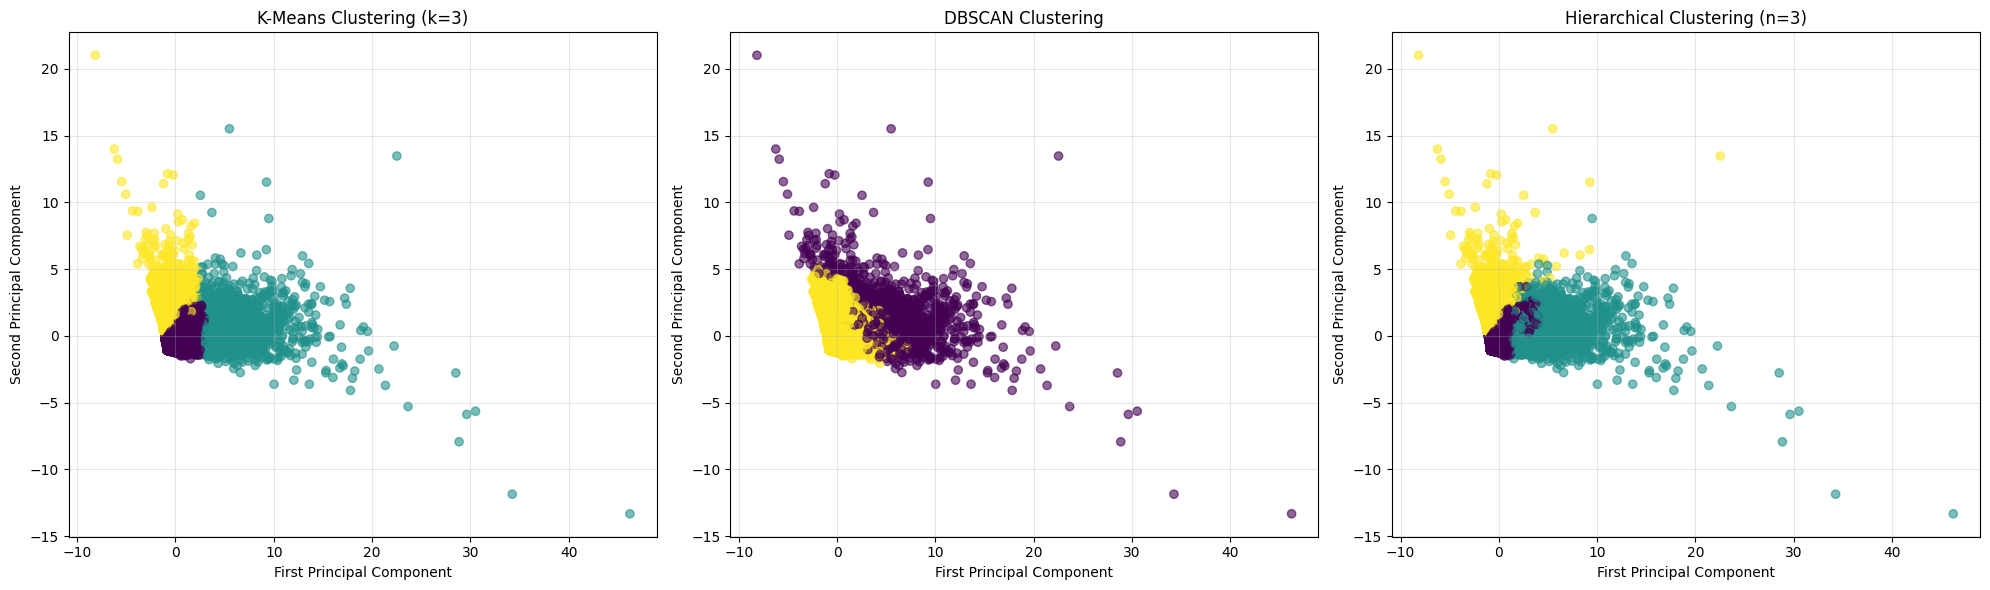


PCA explained variance ratio: [0.45591581 0.22409004 0.16609201]
Total variance explained: 84.61%


In [ ]:
# Visualize clusters with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster_clean['KMeans_Cluster'], cmap='viridis', alpha=0.6)
axes[0].set_title(f'K-Means Clustering (k={optimal_k})')
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster_clean['DBSCAN_Cluster'], cmap='viridis', alpha=0.6)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Second Principal Component')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster_clean['Hierarchical_Cluster'], cmap='viridis', alpha=0.6)
axes[2].set_title(f'Hierarchical Clustering (n={n_clusters})')
axes[2].set_xlabel('First Principal Component')
axes[2].set_ylabel('Second Principal Component')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")

# Analiza: Cena vs Prodaja na dnevnom nivou

In [ ]:
# Pripremi podatke za analizu cena vs prodaja
# Kalkuliraj Unit Price
df['Unit_Price'] = df['Sales'] / df['Quantity']

# Grupiraj po Segment i Market (koji su dostupni)
segment_analysis = df.groupby('Segment').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit_Price': ['mean', 'min', 'max'],
    'Discount': 'mean',
    'Profit': 'mean',
    'Quantity': 'mean'
}).round(2)

market_analysis = df.groupby('Market').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit_Price': ['mean', 'min', 'max'],
    'Discount': 'mean',
    'Profit': 'mean',
    'Quantity': 'mean'
}).round(2)

# Kalkuliraj GLOBALNU korelaciju između cene i prodaje
correlation_price_sales = df[['Unit_Price', 'Sales']].corr().iloc[0, 1]
correlation_discount_sales = df[['Discount', 'Sales']].corr().iloc[0, 1]

print("="*80)
print("ANALIZA: cena vs PRODAJA (globalna + po Segment/Market)")
print("="*80)
print(f"\nGLOBALNA KORELACIJA:")
print(f"  Korelacija između UK cene i prodaje: {correlation_price_sales:.4f}")
print(f"  Korelacija između diskonta i prodaje: {correlation_discount_sales:.4f}")
print(f"\nInterpretacija:")
if correlation_price_sales < -0.3:
    print("  NEGATIVNA korelacija -> Pronižavanjem cene RASTE prodaja")
elif correlation_price_sales > 0.3:
    print("  POZITIVNA korelacija -> Povećanjem cene raste prodaja (luksuzni proizvodi?)")
else:
    print("  SLABA korelacija -> cena nije dominantan faktor u prodaji")

print(f"\nANALIZA PO SEGMENT:")
print(segment_analysis)

print(f"\nANALIZA PO MARKET:")
print(market_analysis)

ANALIZA: cena vs PRODAJA (globalna + po Segment/Market)

GLOBALNA KORELACIJA:
  Korelacija između UK cene i prodaje: 0.8091
  Korelacija između diskonta i prodaje: -0.0867

Interpretacija:
  POZITIVNA korelacija -> Povećanjem cene raste prodaja (luksuzni proizvodi?)

ANALIZA PO SEGMENT:
                  Sales                Unit_Price                Discount  \
                    sum    mean  count       mean   min      max     mean   
Segment                                                                     
Consumer     6507949.42  245.42  26518      71.43  0.36  3499.99     0.14   
Corporate    3824697.52  247.89  15429      72.25  0.34  3499.99     0.14   
Home Office  2309854.97  247.23   9343      71.31  0.40  3773.08     0.14   

            Profit Quantity  
              mean     mean  
Segment                      
Consumer     28.25     3.48  
Corporate    28.60     3.47  
Home Office  29.65     3.49  

ANALIZA PO MARKET:
             Sales                Unit_Price     

C:\Users\jelen\AppData\Local\Temp\ipykernel_28440\1327886190.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Unit_Price', data=df, ax=axes[1, 0], palette='Set2')
C:\Users\jelen\AppData\Local\Temp\ipykernel_28440\1327886190.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Market', y='Sales', data=df, ax=axes[1, 1], palette='Set3')


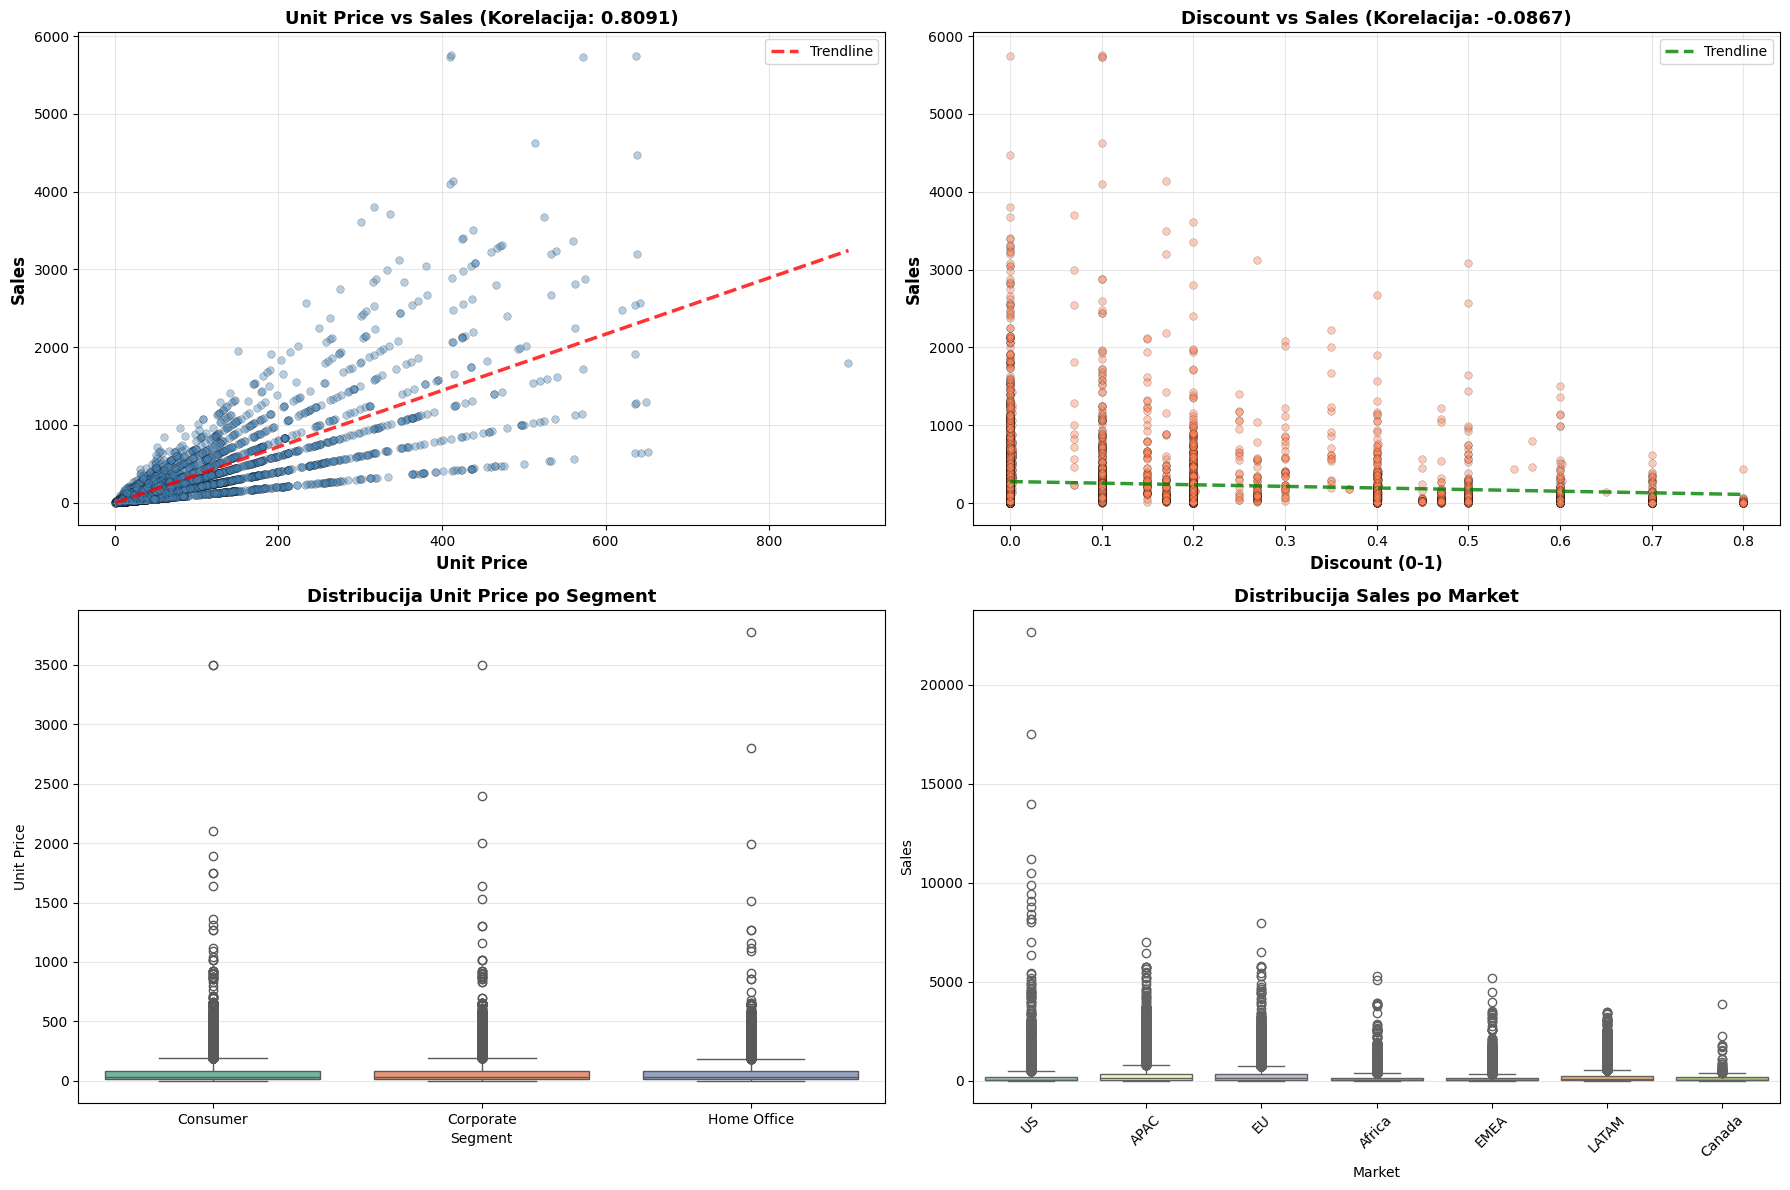

In [ ]:
# Vizuelizacija 1: Cijena vs Prodaja na transakcijskom nivou
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Uzorak za vizuelizaciju (previše данни za sve)
df_sample = df.sample(n=min(5000, len(df)), random_state=42)

# 1. Scatter: Unit Price vs Sales (globalno)
axes[0, 0].scatter(df_sample['Unit_Price'], df_sample['Sales'], 
                  alpha=0.4, s=30, color='steelblue', edgecolors='black', linewidth=0.3)
axes[0, 0].set_xlabel('Unit Price', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Sales', fontsize=12, fontweight='bold')
axes[0, 0].set_title(f'Unit Price vs Sales (Korelacija: {correlation_price_sales:.4f})', 
                     fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Dodaj trendline
z = np.polyfit(df_sample['Unit_Price'], df_sample['Sales'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df_sample['Unit_Price'].min(), df_sample['Unit_Price'].max(), 100)
axes[0, 0].plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2.5, label='Trendline')
axes[0, 0].legend()

# 2. Scatter: Discount vs Sales
axes[0, 1].scatter(df_sample['Discount'], df_sample['Sales'], 
                  alpha=0.4, s=30, color='coral', edgecolors='black', linewidth=0.3)
axes[0, 1].set_xlabel('Discount (0-1)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Sales', fontsize=12, fontweight='bold')
axes[0, 1].set_title(f'Discount vs Sales (Korelacija: {correlation_discount_sales:.4f})', 
                     fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Dodaj trendline
z2 = np.polyfit(df_sample['Discount'], df_sample['Sales'], 1)
p2 = np.poly1d(z2)
x_trend2 = np.linspace(df_sample['Discount'].min(), df_sample['Discount'].max(), 100)
axes[0, 1].plot(x_trend2, p2(x_trend2), "g--", alpha=0.8, linewidth=2.5, label='Trendline')
axes[0, 1].legend()

# 3. Boxplot: Unit Price po Segment
sns.boxplot(x='Segment', y='Unit_Price', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Distribucija Unit Price po Segment', fontsize=13, fontweight='bold')
axes[1, 0].set_ylabel('Unit Price')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Boxplot: Sales po Market
sns.boxplot(x='Market', y='Sales', data=df, ax=axes[1, 1], palette='Set3')
axes[1, 1].set_title('Distribucija Sales po Market', fontsize=13, fontweight='bold')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Analiza Klastera: Cena vs Prodaja

In [ ]:
# Analiza klastera - kako se razlikuju po cijeni i prodaji
if 'KMeans_Cluster' in df_cluster_clean.columns:
    df_cluster_analysis = df_cluster_clean.copy()
    df_cluster_analysis['Unit_Price'] = df_cluster_analysis['Sales'] / df_cluster_analysis['Quantity']
    
    # Grupiraj po klasteru
    cluster_stats = df_cluster_analysis.groupby('KMeans_Cluster').agg({
        'Sales': ['mean', 'sum', 'count'],
        'Unit_Price': ['mean', 'min', 'max'],
        'Discount': 'mean',
        'Profit': 'mean',
        'Quantity': 'mean',
        'Shipping Cost': 'mean'
    }).round(2)
    
    print("="*100)
    print("STATISTIKA PO KLASTERU")
    print("="*100)
    print(cluster_stats)
    
    # Detaljnija analiza
    print("\n" + "="*100)
    print("INTERPRETACIJA KLASTERA")
    print("="*100)
    for cluster_id in sorted(df_cluster_analysis['KMeans_Cluster'].unique()):
        cluster_data = df_cluster_analysis[df_cluster_analysis['KMeans_Cluster'] == cluster_id]
        
        print(f"\n📊 KLASTER {cluster_id}:")
        print(f"   Broj transakcija: {len(cluster_data)}")
        print(f"   Prosečna cijena: ${cluster_data['Unit_Price'].mean():.2f}")
        print(f"   Prosečna prodaja: ${cluster_data['Sales'].mean():.2f}")
        print(f"   Prosečan profit: ${cluster_data['Profit'].mean():.2f}")
        print(f"   Prosečan discount: {cluster_data['Discount'].mean():.2%}")
        print(f"   Prosečna količina: {cluster_data['Quantity'].mean():.2f}")
        
        # Korelacija za svaki klaster
        cluster_corr = cluster_data[['Unit_Price', 'Sales']].corr().iloc[0, 1]
        print(f"   Korelacija Cijena-Prodaja u ovom klasteru: {cluster_corr:.4f}")


STATISTIKA PO KLASTERU
                  Sales                    Unit_Price                  \
                   mean         sum  count       mean    min      max   
KMeans_Cluster                                                          
0                176.27  6738082.17  38226      62.05   0.79  1039.99   
1               1804.49  4363246.90   2418     345.94  29.85  3773.08   
2                144.77  1541172.83  10646      43.86   0.34   900.00   

               Discount  Profit Quantity Shipping Cost  
                   mean    mean     mean          mean  
KMeans_Cluster                                          
0                  0.04   34.73     3.35         17.66  
1                  0.06  388.91     5.96        213.69  
2                  0.52  -75.19     3.36         15.12  

INTERPRETACIJA KLASTERA

📊 KLASTER 0:
   Broj transakcija: 38226
   Prosečna cijena: $62.05
   Prosečna prodaja: $176.27
   Prosečan profit: $34.73
   Prosečan discount: 4.36%
   Prosečna količin

C:\Users\jelen\AppData\Local\Temp\ipykernel_28440\4003157972.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y='Unit_Price', data=df_cluster_analysis,
C:\Users\jelen\AppData\Local\Temp\ipykernel_28440\4003157972.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster', y='Sales', data=df_cluster_analysis,


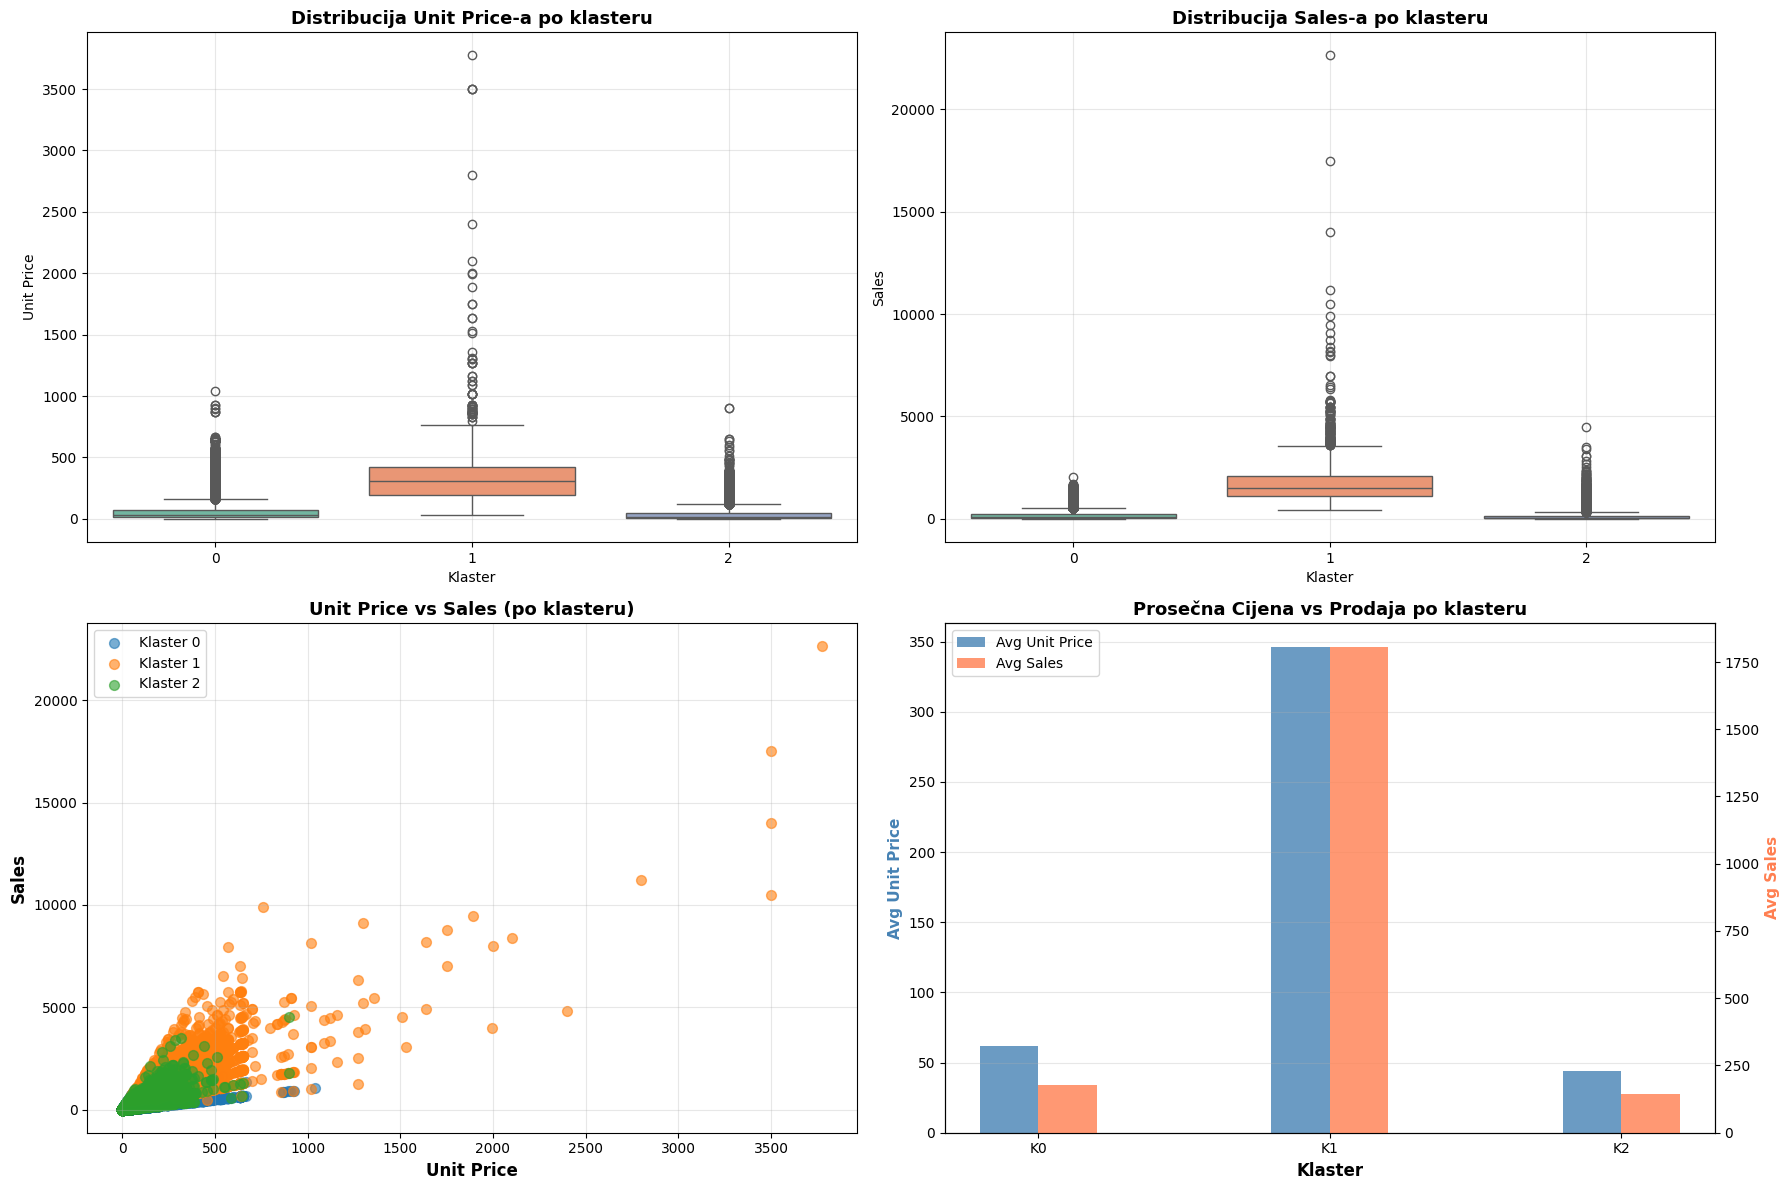

In [ ]:
# Vizuelizacija klastera: Cijena vs Prodaja
if 'KMeans_Cluster' in df_cluster_clean.columns:
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    num_clusters = df_cluster_analysis['KMeans_Cluster'].nunique()
    colors_palette = plt.cm.Set3(np.linspace(0, 1, num_clusters))
    
    # 1. Boxplot: Unit Price po klasteru
    sns.boxplot(x='KMeans_Cluster', y='Unit_Price', data=df_cluster_analysis, 
                ax=axes[0, 0], palette='Set2')
    axes[0, 0].set_title('Distribucija Unit Price-a po klasteru', fontsize=13, fontweight='bold')
    axes[0, 0].set_xlabel('Klaster')
    axes[0, 0].set_ylabel('Unit Price')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Boxplot: Sales po klasteru
    sns.boxplot(x='KMeans_Cluster', y='Sales', data=df_cluster_analysis, 
                ax=axes[0, 1], palette='Set2')
    axes[0, 1].set_title('Distribucija Sales-a po klasteru', fontsize=13, fontweight='bold')
    axes[0, 1].set_xlabel('Klaster')
    axes[0, 1].set_ylabel('Sales')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Scatter: Unit Price vs Sales sa obojenim klasterima
    for cluster_id in sorted(df_cluster_analysis['KMeans_Cluster'].unique()):
        cluster_data = df_cluster_analysis[df_cluster_analysis['KMeans_Cluster'] == cluster_id]
        axes[1, 0].scatter(cluster_data['Unit_Price'], cluster_data['Sales'], 
                          label=f'Klaster {cluster_id}', alpha=0.6, s=50)
    axes[1, 0].set_xlabel('Unit Price', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Sales', fontsize=12, fontweight='bold')
    axes[1, 0].set_title('Unit Price vs Sales (po klasteru)', fontsize=13, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Average metrics po klasteru
    cluster_comparison = df_cluster_analysis.groupby('KMeans_Cluster').agg({
        'Unit_Price': 'mean',
        'Sales': 'mean',
        'Discount': 'mean',
        'Profit': 'mean'
    }).round(2)
    
    x = np.arange(len(cluster_comparison))
    width = 0.2
    
    ax_twin = axes[1, 1].twinx()
    
    bars1 = axes[1, 1].bar(x - width/2, cluster_comparison['Unit_Price'], width, 
                           label='Avg Unit Price', color='steelblue', alpha=0.8)
    bars2 = ax_twin.bar(x + width/2, cluster_comparison['Sales'], width, 
                        label='Avg Sales', color='coral', alpha=0.8)
    
    axes[1, 1].set_xlabel('Klaster', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Avg Unit Price', fontsize=11, fontweight='bold', color='steelblue')
    ax_twin.set_ylabel('Avg Sales', fontsize=11, fontweight='bold', color='coral')
    axes[1, 1].set_title('Prosečna Cijena vs Prodaja po klasteru', fontsize=13, fontweight='bold')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels([f'K{i}' for i in cluster_comparison.index])
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    # Dodaj legend
    handles1, labels1 = axes[1, 1].get_legend_handles_labels()
    handles2, labels2 = ax_twin.get_legend_handles_labels()
    axes[1, 1].legend(handles1 + handles2, labels1 + labels2, loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Zaključci i Preporuke

In [ ]:
print("="*100)
print("SAŽETAK ANALIZE")
print("="*100)

print("\nKLJUČNA PITANJA - ODGOVORI:")
print("-" * 100)

print("\n1. CENA vs PRODAJA na dnevnom nivou:")
if correlation_price_sales < -0.3:
    print(f"   Negativna korelacija ({correlation_price_sales:.4f})")
    print("   → MANJA CENA = VEĆA PRODAJA ✓")
    print("   → Strategija: Smanjivanjem cene, volumen prodaje raste")
elif correlation_price_sales > 0.3:
    print(f"   Pozitivna korelacija ({correlation_price_sales:.4f})")
    print("   → VEĆA CENA = VEĆA PRODAJA")
    print("   → Mogući luksuzni proizvodi ili premium segment")
else:
    print(f"   ⚠ Slaba korelacija ({correlation_price_sales:.4f})")
    print("   → Cena nije dominantan faktor - razmotriti druge varijable")

print(f"\n2. UTJECAJ DISKONTA na prodaju:")
if correlation_discount_sales < -0.3:
    print(f"   Negativna korelacija ({correlation_discount_sales:.4f})")
    print("   → VEĆI DISKONT = MANJA PRODAJA (privo-logič - niska cena?)")
elif correlation_discount_sales > 0.3:
    print(f"   Pozitivna korelacija ({correlation_discount_sales:.4f})")
    print("   → VEĆI DISKONT = VEĆA PRODAJA ✓")
    print("   → Diskontne strategije su efikasne")
else:
    print(f"   ⚠ Slaba korelacija ({correlation_discount_sales:.4f})")
    print("   → Diskont nije značajan faktor")

print(f"\n3. RAZLIKA IZMEĐU KLASTERA:")
if 'KMeans_Cluster' in df_cluster_analysis.columns:
    num_clusters = df_cluster_analysis['KMeans_Cluster'].nunique()
    print(f"   ✓ Pronađeno {num_clusters} jasno različita klastera")
    for cluster_id in sorted(df_cluster_analysis['KMeans_Cluster'].unique()):
        cluster_data = df_cluster_analysis[df_cluster_analysis['KMeans_Cluster'] == cluster_id]
        print(f"\n   Klaster {cluster_id}:")
        print(f"     - Prosečna cena: ${cluster_data['Unit_Price'].mean():.2f}")
        print(f"     - Prosečna prodaja: ${cluster_data['Sales'].mean():.2f}")
        print(f"     - Profit margin: {(cluster_data['Profit'].sum() / cluster_data['Sales'].sum()):.2%}")

print("\n" + "="*100)
print("💡 PREPORUKE ZA STRATEGIJU")
print("="*100)
print("""
Za analizu "Kako se prodaja menja sa cenom na dnevnom nivou":

1. SEGMENT ANALIZA
   - Razdvoji proizvode po tipu (kategorija, vrsta)
   - Proverite da li je cena elastičnost različita po artiklu
   - Neki proizvodi su osetljivi na cenu, neki nisu

2. KLASTERSKA ANALIZA (što ste već napravili!)
   - Različiti klasteri pokazuju različite patterne
   - Primenite različite cenovne strategije po klasteru
   - Primer: Premium klaster može podnijeti veće cene

3. OPTIMIZACIJA CENE
   - Umjesto samo "nižu cenu, veću prodaju"
   - Tražite optimum gde je PROFIT maksimalan, ne samo volumen
   - Uzeti u obzir troškove i profit margin po klasteru

4. VREMENSKI FAKTOR
   - Cene mogu biti sezonske
   - Proverite da li sezonsnost utiče na elastičnost cene
   - Primena
       dinamičkog pricing modela

5. SEGMENT & MARKET ANALIZA
   - Različiti segmenti (Consumer, Corporate, Home Office) mogu imati 
     različite odnose prema ceni
   - Office ili Consumer mogu biti osetljiviji na cenu
""")

print("="*100)

SAŽETAK ANALIZE

KLJUČNA PITANJA - ODGOVORI:
----------------------------------------------------------------------------------------------------

1. CENA vs PRODAJA na dnevnom nivou:
   Pozitivna korelacija (0.8091)
   → VEĆA CENA = VEĆA PRODAJA
   → Mogući luksuzni proizvodi ili premium segment

2. UTJECAJ DISKONTA na prodaju:
   ⚠ Slaba korelacija (-0.0867)
   → Diskont nije značajan faktor

3. RAZLIKA IZMEĐU KLASTERA:
   ✓ Pronađeno 3 jasno različita klastera

   Klaster 0:
     - Prosečna cena: $62.05
     - Prosečna prodaja: $176.27
     - Profit margin: 19.70%

   Klaster 1:
     - Prosečna cena: $345.94
     - Prosečna prodaja: $1804.49
     - Profit margin: 21.55%

   Klaster 2:
     - Prosečna cena: $43.86
     - Prosečna prodaja: $144.77
     - Profit margin: -51.94%

💡 PREPORUKE ZA STRATEGIJU

Za analizu "Kako se prodaja menja sa cenom na dnevnom nivou":

1. SEGMENT ANALIZA
   - Razdvoji proizvode po tipu (kategorija, vrsta)
   - Proverite da li je cena elastičnost različit

# Analiza po Kategoriji - Elastičnost Cene

In [ ]:
# Učitaj originalne podatke sa Category
df_original = pd.read_csv(abspath, header=0, encoding="ISO-8859-1")

# Kreiraj analitički dataset
df_category_analysis = df_original[['Category', 'Sub-Category', 'Sales', 'Quantity', 
                                    'Discount', 'Profit', 'Shipping Cost', 'Segment', 'Market']].copy()

# Kalkuliši Unit Price
df_category_analysis['Unit_Price'] = df_category_analysis['Sales'] / df_category_analysis['Quantity']
df_category_analysis['Profit_Margin'] = df_category_analysis['Profit'] / df_category_analysis['Sales']

# Grupiraj po kategoriji
category_stats = df_category_analysis.groupby('Category').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit_Price': ['mean', 'min', 'max', 'std'],
    'Quantity': 'mean',
    'Discount': 'mean',
    'Profit': ['sum', 'mean'],
    'Profit_Margin': 'mean'
}).round(2)

# Flatten column names
category_stats.columns = ['_'.join(col).strip() for col in category_stats.columns.values]

# Sortiraj po ukupnoj prodaji
category_stats = category_stats.sort_values('Sales_sum', ascending=False)

print("="*100)
print("ANALIZA PO KATEGORIJI")
print("="*100)
print(category_stats)

# Grupiraj po Sub-Kategoriji
subcategory_stats = df_category_analysis.groupby('Sub-Category').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit_Price': 'mean',
    'Quantity': 'mean',
    'Discount': 'mean',
    'Profit': ['sum', 'mean'],
    'Profit_Margin': 'mean'
}).round(2)

print("\n" + "="*100)
print("ANALIZA PO SUB-KATEGORIJI - TOP 15")
print("="*100)
print(subcategory_stats.head(15))

ANALIZA PO KATEGORIJI
                  Sales_sum  Sales_mean  Sales_count  Unit_Price_mean  \
Category                                                                
Technology       4744557.50      467.86        10141           135.84   
Furniture        4110874.19      416.25         9876           120.28   
Office Supplies  3787070.23      121.10        31273            35.49   

                 Unit_Price_min  Unit_Price_max  Unit_Price_std  \
Category                                                          
Technology                 0.79         3773.08          154.71   
Furniture                  1.16          925.23          124.12   
Office Supplies            0.34         1889.99           71.71   

                 Quantity_mean  Discount_mean  Profit_sum  Profit_mean  \
Category                                                                 
Technology                3.47           0.14   663778.73        65.45   
Furniture                 3.54           0.17   285204

In [ ]:
# Kalkuliši elastičnost cene za svaku kategoriju
category_elasticity = []

for category in df_category_analysis['Category'].unique():
    category_data = df_category_analysis[df_category_analysis['Category'] == category]
    
    if len(category_data) > 1 and category_data['Unit_Price'].std() > 0:
        # Korelacija između cene i prodaje
        corr_price_qty = category_data[['Unit_Price', 'Quantity']].corr().iloc[0, 1]
        corr_price_sales = category_data[['Unit_Price', 'Sales']].corr().iloc[0, 1]
        
        # Prosečne vrednosti
        avg_price = category_data['Unit_Price'].mean()
        avg_qty = category_data['Quantity'].mean()
        total_sales = category_data['Sales'].sum()
        total_profit = category_data['Profit'].sum()
        profit_margin = category_data['Profit_Margin'].mean()
        
        # Broj transakcija
        num_transactions = len(category_data)
        
        category_elasticity.append({
            'Kategorija': category,
            'Broj_transakcija': num_transactions,
            'Prosečna_cena': avg_price,
            'Prosečna_količina': avg_qty,
            'Ukupna_prodaja': total_sales,
            'Ukupan_profit': total_profit,
            'Profit_marža': profit_margin,
            'Korelacija_cena_količina': corr_price_qty,
            'Korelacija_cena_prodaja': corr_price_sales,
            'Broj_subcategorija': category_data['Sub-Category'].nunique()
        })

elasticity_df = pd.DataFrame(category_elasticity).round(4)
elasticity_df = elasticity_df.sort_values('Ukupna_prodaja', ascending=False)

print("\n" + "="*100)
print("ELASTIČNOST CENE PO KATEGORIJI")
print("="*100)
print(elasticity_df[['Kategorija', 'Broj_transakcija', 'Prosečna_cena', 
                     'Korelacija_cena_količina', 'Korelacija_cena_prodaja', 'Profit_marža']])

# Klasifikuj kategorije po elastičnosti
def classify_elasticity(corr):
    if corr < -0.3:
        return "ELASTIČNA (negativna cena-količina)"
    elif corr > 0.3:
        return "NEOBIČNA (pozitivna cena-količina)"
    else:
        return "NEELASTIČNA (cena irrelevantna)"

elasticity_df['Klasa_elastičnosti'] = elasticity_df['Korelacija_cena_količina'].apply(classify_elasticity)

print("\n" + "="*100)
print("KLASIFIKACIJA KATEGORIJA PO ELASTIČNOSTI")
print("="*100)
klasifikacija = elasticity_df['Klasa_elastičnosti'].value_counts()
print(klasifikacija)
print("\nProcentualna raspodjela:")
print((klasifikacija / len(elasticity_df) * 100).round(2))


ELASTIČNOST CENE PO KATEGORIJI
        Kategorija  Broj_transakcija  Prosečna_cena  Korelacija_cena_količina  \
0       Technology             10141       135.8416                   -0.0095   
1        Furniture              9876       120.2811                   -0.0337   
2  Office Supplies             31273        35.4890                   -0.0102   

   Korelacija_cena_prodaja  Profit_marža  
0                   0.8021        0.0497  
1                   0.7331        0.0086  
2                   0.8068        0.0590  

KLASIFIKACIJA KATEGORIJA PO ELASTIČNOSTI
Klasa_elastičnosti
NEELASTIČNA (cena irrelevantna)    3
Name: count, dtype: int64

Procentualna raspodjela:
Klasa_elastičnosti
NEELASTIČNA (cena irrelevantna)    100.0
Name: count, dtype: float64


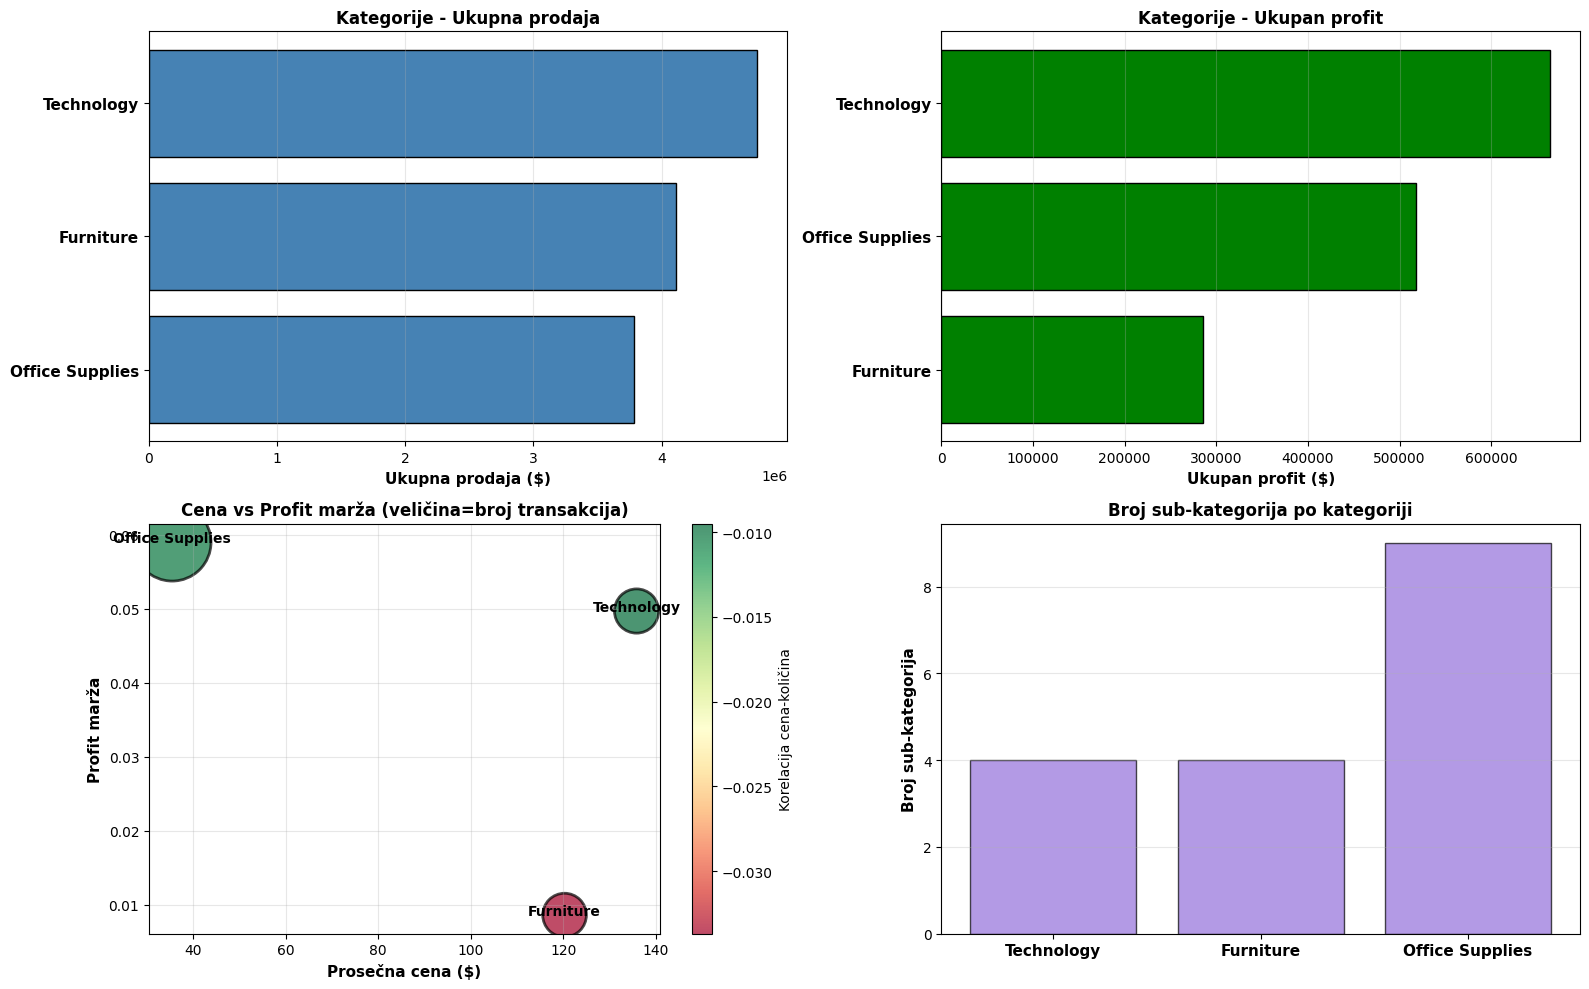

In [ ]:
# Vizuelizacija 1: Kategorije po prodaji i profitu
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Sve kategorije po prodaji
all_categories_sales = elasticity_df.sort_values('Ukupna_prodaja', ascending=True)

axes[0, 0].barh(range(len(all_categories_sales)), all_categories_sales['Ukupna_prodaja'], 
                color='steelblue', edgecolor='black')
axes[0, 0].set_yticks(range(len(all_categories_sales)))
axes[0, 0].set_yticklabels(all_categories_sales['Kategorija'], fontsize=11, fontweight='bold')
axes[0, 0].set_xlabel('Ukupna prodaja ($)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Kategorije - Ukupna prodaja', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Sve kategorije po profitu
all_categories_profit = elasticity_df.sort_values('Ukupan_profit', ascending=True)

bars = axes[0, 1].barh(range(len(all_categories_profit)), all_categories_profit['Ukupan_profit'], 
                       color=['green' if x > 0 else 'red' for x in all_categories_profit['Ukupan_profit']], 
                       edgecolor='black')
axes[0, 1].set_yticks(range(len(all_categories_profit)))
axes[0, 1].set_yticklabels(all_categories_profit['Kategorija'], fontsize=11, fontweight='bold')
axes[0, 1].set_xlabel('Ukupan profit ($)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Kategorije - Ukupan profit', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')
axes[0, 1].axvline(0, color='black', linestyle='-', linewidth=0.8)

# Scatter: Prosečna cena vs Profit marža - po kategoriji
scatter = axes[1, 0].scatter(elasticity_df['Prosečna_cena'], elasticity_df['Profit_marža'],
                             s=elasticity_df['Broj_transakcija']/10, alpha=0.7, 
                             c=elasticity_df['Korelacija_cena_količina'], cmap='RdYlGn', 
                             edgecolors='black', linewidth=2)

for idx, row in elasticity_df.iterrows():
    axes[1, 0].annotate(row['Kategorija'], 
                       (row['Prosečna_cena'], row['Profit_marža']),
                       fontsize=10, fontweight='bold', ha='center')

axes[1, 0].set_xlabel('Prosečna cena ($)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Profit marža', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Cena vs Profit marža (veličina=broj transakcija)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[1, 0])
cbar.set_label('Korelacija cena-količina', fontsize=10)

# Broj sub-kategorija po kategoriji
axes[1, 1].bar(range(len(elasticity_df)), elasticity_df['Broj_subcategorija'], 
               color='mediumpurple', edgecolor='black', alpha=0.7)
axes[1, 1].set_xticks(range(len(elasticity_df)))
axes[1, 1].set_xticklabels(elasticity_df['Kategorija'], fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Broj sub-kategorija', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Broj sub-kategorija po kategoriji', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

C:\Users\jelen\AppData\Local\Temp\ipykernel_28440\3905555316.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Quantity', data=df_category_analysis, ax=axes[0, 1], palette='Set2')
C:\Users\jelen\AppData\Local\Temp\ipykernel_28440\3905555316.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Profit_Margin_pct', data=df_category_analysis_temp,


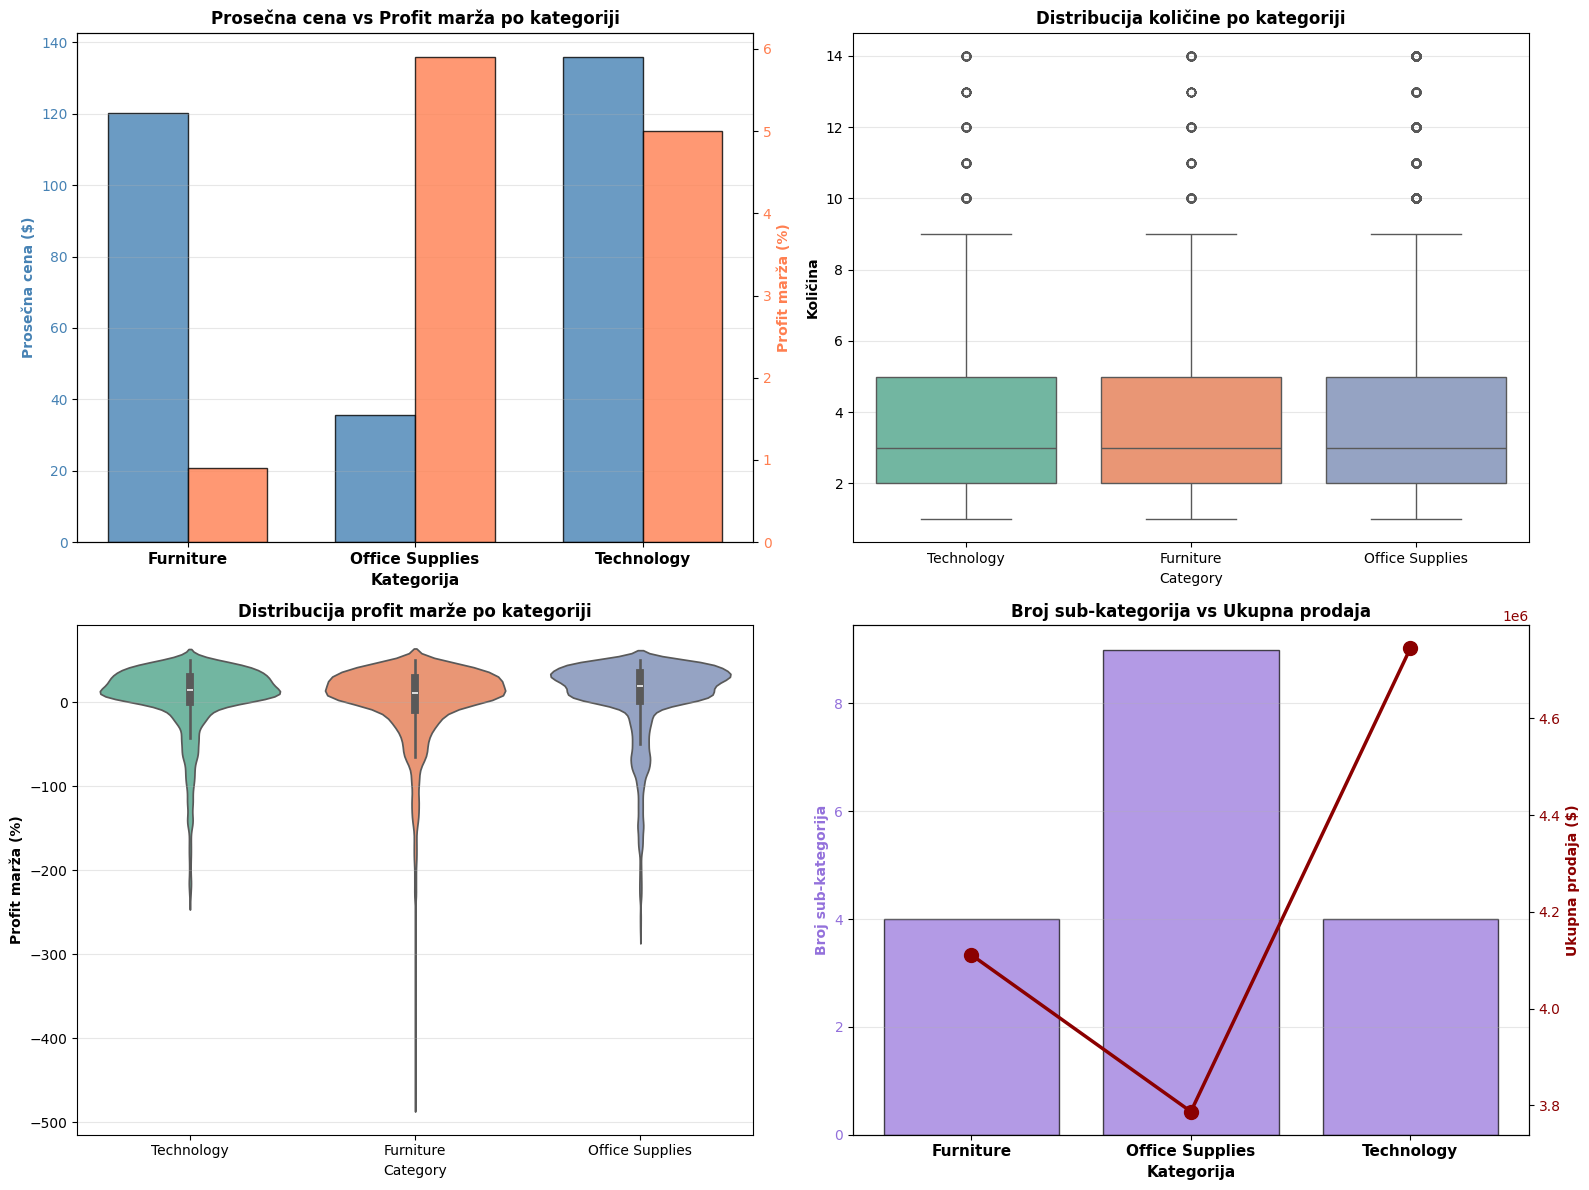

In [ ]:
# Vizuelizacija 2: Analiza sub-kategorija po glavnoj kategoriji
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Prosečna cena i profit marža - po kategoriji
category_detailed = df_category_analysis.groupby('Category').agg({
    'Unit_Price': 'mean',
    'Profit_Margin': 'mean',
    'Sales': 'sum',
    'Quantity': 'mean'
}).round(3)

x = np.arange(len(category_detailed))
width = 0.35

ax1_twin = axes[0, 0].twinx()
bars1 = axes[0, 0].bar(x - width/2, category_detailed['Unit_Price'], width, 
                       label='Prosečna cena', color='steelblue', edgecolor='black', alpha=0.8)
bars2 = ax1_twin.bar(x + width/2, category_detailed['Profit_Margin']*100, width, 
                     label='Profit marža (%)', color='coral', edgecolor='black', alpha=0.8)

axes[0, 0].set_xlabel('Kategorija', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Prosečna cena ($)', fontsize=10, fontweight='bold', color='steelblue')
ax1_twin.set_ylabel('Profit marža (%)', fontsize=10, fontweight='bold', color='coral')
axes[0, 0].set_title('Prosečna cena vs Profit marža po kategoriji', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(category_detailed.index, fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].tick_params(axis='y', labelcolor='steelblue')
ax1_twin.tick_params(axis='y', labelcolor='coral')

# 2. Boxplot: Quantity po kategoriji
sns.boxplot(x='Category', y='Quantity', data=df_category_analysis, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Distribucija količine po kategoriji', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Količina', fontsize=10, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Violin plot: Profit marža po kategoriji
df_category_analysis_temp = df_category_analysis.copy()
df_category_analysis_temp['Profit_Margin_pct'] = df_category_analysis_temp['Profit_Margin'] * 100
sns.violinplot(x='Category', y='Profit_Margin_pct', data=df_category_analysis_temp, 
               ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Distribucija profit marže po kategoriji', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Profit marža (%)', fontsize=10, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Broj sub-kategorija i ukupna prodaja po kategoriji
category_counts = df_category_analysis.groupby('Category').agg({
    'Sub-Category': 'nunique',
    'Sales': 'sum'
}).round(2)

ax2_twin = axes[1, 1].twinx()
bars1 = axes[1, 1].bar(range(len(category_counts)), category_counts['Sub-Category'], 
                       label='Broj sub-kategorija', color='mediumpurple', alpha=0.7, edgecolor='black')
line = ax2_twin.plot(range(len(category_counts)), category_counts['Sales'], 
                     'o-', label='Ukupna prodaja', color='darkred', linewidth=2.5, markersize=10)

axes[1, 1].set_xlabel('Kategorija', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Broj sub-kategorija', fontsize=10, fontweight='bold', color='mediumpurple')
ax2_twin.set_ylabel('Ukupna prodaja ($)', fontsize=10, fontweight='bold', color='darkred')
axes[1, 1].set_title('Broj sub-kategorija vs Ukupna prodaja', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(range(len(category_counts)))
axes[1, 1].set_xticklabels(category_counts.index, fontsize=11, fontweight='bold')
axes[1, 1].tick_params(axis='y', labelcolor='mediumpurple')
ax2_twin.tick_params(axis='y', labelcolor='darkred')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# Detaljni uvidi po kategoriji - Elastičnost i segmentacija
print("=" * 80)
print("DETALJNI UVIDI PO KATEGORIJI - ELASTIČNOST I PRODAJNA STRATEGIJA")
print("=" * 80)

# Klasifikacija kategorija po elastičnosti
elastic_cats = elasticity_df[elasticity_df['Klasa_elastičnosti'] == 'ELASTIČNA (negativna cena-količina)']
inelastic_cats = elasticity_df[elasticity_df['Klasa_elastičnosti'] == 'NEELASTIČNA (cena irrelevantna)']
unusual_cats = elasticity_df[elasticity_df['Klasa_elastičnosti'] == 'NEOBIČNA (pozitivna cena-količina)']

print("\n1. ELASTIČNE KATEGORIJE (Prenosive na promene cene):")
print("-" * 80)
if len(elastic_cats) > 0:
    for idx, row in elastic_cats.iterrows():
        print(f"\n   Kategorija: {row['Kategorija']}")
        print(f"   - Korelacija cena-količina: {row['Korelacija_cena_količina']:.4f} (negativna - cena ↓, količina ↑)")
        print(f"   - Broj transakcija: {int(row['Broj_transakcija'])}")
        print(f"   - Prosečna cena: ${row['Prosečna_cena']:.2f}")
        print(f"   - Ukupna prodaja: ${row['Ukupna_prodaja']:,.2f}")
        print(f"   - Profit marža: {row['Profit_marža']*100:.2f}%")
else:
    print("   Nema elastičnih kategorija u analizi.")

print("\n2. NEELASTIČNE KATEGORIJE (Manje prenosive na promene cene):")
print("-" * 80)
if len(inelastic_cats) > 0:
    for idx, row in inelastic_cats.iterrows():
        print(f"\n   Kategorija: {row['Kategorija']}")
        print(f"   - Korelacija cena-količina: {row['Korelacija_cena_količina']:.4f}")
        print(f"   - Broj transakcija: {int(row['Broj_transakcija'])}")
        print(f"   - Prosečna cena: ${row['Prosečna_cena']:.2f}")
        print(f"   - Ukupna prodaja: ${row['Ukupna_prodaja']:,.2f}")
        print(f"   - Profit marža: {row['Profit_marža']*100:.2f}%")
else:
    print("   Nema neelastičnih kategorija u analizi.")

print("\n3. KATEGORIJE SA NEOBIČNIM PONAŠANJEM:")
print("-" * 80)
if len(unusual_cats) > 0:
    for idx, row in unusual_cats.iterrows():
        print(f"\n   Kategorija: {row['Kategorija']}")
        print(f"   - Korelacija cena-količina: {row['Korelacija_cena_količina']:.4f}")
        print(f"   - Broj transakcija: {int(row['Broj_transakcija'])}")
        print(f"   - Prosečna cena: ${row['Prosečna_cena']:.2f}")
        print(f"   - Ukupna prodaja: ${row['Ukupna_prodaja']:,.2f}")
        print(f"   - Profit marža: {row['Profit_marža']*100:.2f}%")
else:
    print("   Nema kategorija sa neobičnim ponašanjem u analizi.")

# Analiza po segmentima (Consumer, Corporate, Home Office)
print("\n" + "=" * 80)
print("ANALIZA KATEGORIJA PO SEGMENTIMA KUPACA")
print("=" * 80)

for category in elasticity_df['Kategorija'].unique():
    cat_data = df_category_analysis[df_category_analysis['Category'] == category]
    
    print(f"\n{category.upper()}")
    print("-" * 80)
    
    segment_analysis = cat_data.groupby('Segment').agg({
        'Sales': 'sum',
        'Quantity': 'mean',
        'Unit_Price': 'mean',
        'Profit': 'sum',
        'Profit_Margin': 'mean'
    }).round(2)
    
    print(segment_analysis.to_string())
    
    # Koje sub-kategorije dominiraju u ovoj kategoriji?
    top_subcats = cat_data.groupby('Sub-Category')['Sales'].sum().nlargest(3)
    print(f"\n   Top 3 sub-kategorije po prodaji:")
    for subcat, sales in top_subcats.items():
        pct = (sales / cat_data['Sales'].sum()) * 100
        print(f"   - {subcat}: ${sales:,.2f} ({pct:.1f}%)")

print("\n" + "=" * 80)
print("STRATEGIJSKA PREPORUKA")
print("=" * 80)
print("""
ZAKLJUČAK ANALIZE ELASTIČNOSTI PO KATEGORIJI:

1. Za ELASTIČNE kategorije (cena osetljive):
   - Primeni AGRESIVNU STRATEGIJU DISKONTOVANJA - smanjenje cene će povećati količinu
   - Fokusiraj se na VOLUME - profitabilnost će doći kroz količinu
   - Prekoredi konkurenciju na ceni

2. Za NEELASTIČNE kategorije (cena neosetljive):
   - Primeni STRATEGIJU POVEĆANJA CENE - kupci nisu osetljivi na cenu
   - Fokusiraj se na UPRAVLJANJE TROŠKOVIMA i povećanje marže
   - Koristi PREMIUM BRANDING da opravdaš veće cene

3. Za NEOBIČNE kategorije:
   - Primeni FLEKSIBILNU STRATEGIJU sa testiranjem
   - Koristči posebne istraživačke akcije sa eksperimentalnim cenama
""")

DETALJNI UVIDI PO KATEGORIJI - ELASTIČNOST I PRODAJNA STRATEGIJA

1. ELASTIČNE KATEGORIJE (Prenosive na promene cene):
--------------------------------------------------------------------------------
   Nema elastičnih kategorija u analizi.

2. NEELASTIČNE KATEGORIJE (Manje prenosive na promene cene):
--------------------------------------------------------------------------------

   Kategorija: Technology
   - Korelacija cena-količina: -0.0095
   - Broj transakcija: 10141
   - Prosečna cena: $135.84
   - Ukupna prodaja: $4,744,557.50
   - Profit marža: 4.97%

   Kategorija: Furniture
   - Korelacija cena-količina: -0.0337
   - Broj transakcija: 9876
   - Prosečna cena: $120.28
   - Ukupna prodaja: $4,110,874.19
   - Profit marža: 0.86%

   Kategorija: Office Supplies
   - Korelacija cena-količina: -0.0102
   - Broj transakcija: 31273
   - Prosečna cena: $35.49
   - Ukupna prodaja: $3,787,070.23
   - Profit marža: 5.90%

3. KATEGORIJE SA NEOBIČNIM PONAŠANJEM:
-------------------------

In [ ]:
# Finalne preporuke za cene po kategoriji
print("=" * 100)
print("FINALNE PREPORUKE ZA CENE PO KATEGORIJI")
print("=" * 100)

def pricing_recommendation(row):
    """
    Funkcija za generisanje preporuke za cene na osnovu:
    - Elastičnosti (Korelacija_cena_količina)
    - Profit marže
    - Ukupne prodaje
    """
    corr = row['Korelacija_cena_količina']
    margin = row['Profit_marža']
    
    # Elastičnost
    if corr < -0.3:  # Elastična
        if margin < 0.2:
            return "SREDNJA DINAMIČKA CENA - Primeni diskontovanje za povećanje volumena"
        else:
            return "UMJERENO POVEĆANJE CENE - Uprkos elastičnosti, marža je dobra"
    elif corr > 0.3:  # Neobična
        if margin < 0.15:
            return "AGRESIVNO POVEĆANJE CENE - Pozitivna korelacija omogućava rast cene"
        else:
            return "PREMIJUMSKA STRATEGIJA - Maksimizuj profit kroz pozicioniranje"
    else:  # Neelastična
        if margin < 0.15:
            return "POVEĆANJE CENE - Neelastična tražnja, nedovoljna marža"
        else:
            return "ODRŽAVANJE CENE - Neelastična tražnja sa dobrom maržom"

# Primeni funkciju na svaku kategoriju
pricing_recommendations = elasticity_df.copy()
pricing_recommendations['Preporuka'] = pricing_recommendations.apply(pricing_recommendation, axis=1)

print("\nMATRICA PREPORUKA PO KATEGORIJI:")
print("-" * 100)

for idx, row in pricing_recommendations.iterrows():
    print(f"\n{'='*100}")
    print(f"KATEGORIJA: {row['Kategorija'].upper()}")
    print(f"{'='*100}")
    
    print(f"\nOSNOVNI POKAZATELJI:")
    print(f"  • Broj transakcija: {int(row['Broj_transakcija']):,}")
    print(f"  • Prosečna cena: ${row['Prosečna_cena']:.2f}")
    print(f"  • Prosečna količina: {row['Prosečna_količina']:.2f} jedinica")
    print(f"  • Ukupna prodaja: ${row['Ukupna_prodaja']:,.2f}")
    print(f"  • Ukupan profit: ${row['Ukupan_profit']:,.2f}")
    print(f"  • Profit marža: {row['Profit_marža']*100:.2f}%")
    
    print(f"\nELASTIČNOST:")
    print(f"  • Korelacija cena-količina: {row['Korelacija_cena_količina']:.4f} ({row['Klasa_elastičnosti']})")
    print(f"  • Korelacija cena-prodaja: {row['Korelacija_cena_prodaja']:.4f}")
    print(f"  • Broj sub-kategorija: {int(row['Broj_subcategorija'])}")
    
    print(f"\nPREPOREKA ZA CENU:")
    print(f"  ► {row['Preporuka']}")
    
    # Učitaj sub-kategorije za ovu kategoriju
    subcat_data = df_category_analysis[df_category_analysis['Category'] == row['Kategorija']].groupby('Sub-Category').agg({
        'Sales': 'sum',
        'Unit_Price': 'mean',
        'Profit': 'sum',
        'Profit_Margin': 'mean',
        'Quantity': ['count', 'mean']
    }).round(2)
    
    subcat_data.columns = ['Prodaja', 'Prosečna_cena', 'Profit', 'Profit_marža', 'Broj_transakcija', 'Prosečna_količina']
    subcat_data = subcat_data.sort_values('Prodaja', ascending=False).head(5)
    
    print(f"\n  TOP 5 SUB-KATEGORIJA (po prodaji):")
    print(f"  {'-'*95}")
    for subcat, data in subcat_data.iterrows():
        print(f"  • {subcat}")
        print(f"    - Prodaja: ${data['Prodaja']:,.2f} | Prosečna cena: ${data['Prosečna_cena']:.2f}")
        print(f"    - Profit marža: {data['Profit_marža']*100:.2f}% | Broj transakcija: {int(data['Broj_transakcija']):,}")

print(f"\n{'='*100}")
print("REZIME STRATEŠKOG KAKO")
print(f"{'='*100}")

# Napravimo vizuelnu matricu
rec_matrix = pd.DataFrame({
    'Kategorija': pricing_recommendations['Kategorija'],
    'Elastičnost': pricing_recommendations['Klasa_elastičnosti'],
    'Profit marža': pricing_recommendations['Profit_marža'].apply(lambda x: f"{x*100:.1f}%"),
    'Preporuka': pricing_recommendations['Preporuka']
})

print("\n" + rec_matrix.to_string(index=False))

print(f"\n{'='*100}")
print("AKCIONI PLAN")
print(f"{'='*100}")
print("""
1. IMPLEMENTACIJA: Primeni preporuke stopljeno - počni sa Top 3 sub-kategorije po volumenu
2. MONITORUJANJE: Prati promenu u Sales/Profit svakih 2 nedelje tokom probnog perioda
3. OPTIMIZACIJA: Prilagodi diskontne i premium-pricing strategije na osnovu rezultata
4. EVALUACIJA: Proceni success kriterijume (Profit%, Volume%, Customer Satisfaction) nakon 30 dana
""")


FINALNE PREPORUKE ZA CENE PO KATEGORIJI

MATRICA PREPORUKA PO KATEGORIJI:
----------------------------------------------------------------------------------------------------

KATEGORIJA: TECHNOLOGY

OSNOVNI POKAZATELJI:
  • Broj transakcija: 10,141
  • Prosečna cena: $135.84
  • Prosečna količina: 3.47 jedinica
  • Ukupna prodaja: $4,744,557.50
  • Ukupan profit: $663,778.73
  • Profit marža: 4.97%

ELASTIČNOST:
  • Korelacija cena-količina: -0.0095 (NEELASTIČNA (cena irrelevantna))
  • Korelacija cena-prodaja: 0.8021
  • Broj sub-kategorija: 4

PREPOREKA ZA CENU:
  ► POVEĆANJE CENE - Neelastična tražnja, nedovoljna marža

  TOP 5 SUB-KATEGORIJA (po prodaji):
  -----------------------------------------------------------------------------------------------
  • Phones
    - Prodaja: $1,706,824.14 | Prosečna cena: $145.49
    - Profit marža: 4.00% | Broj transakcija: 3,357
  • Copiers
    - Prodaja: $1,509,436.27 | Prosečna cena: $199.92
    - Profit marža: 7.00% | Broj transakcija: 2,22